# Gaussian Mixture Models

A Gaussian Mixture is a function that is comprised of several Gaussians, each identified by k ∈ {1,…, K}, where K is the number of clusters of our dataset. Each Gaussian k in the mixture is comprised of the following parameters:
A mean μ that defines its centre.
A covariance Σ that defines its width. This would be equivalent to the dimensions of an ellipsoid in a multivariate scenario.
A mixing probability π that defines how big or small the Gaussian function will be.

Expectation maximization for mixture models consists of two steps.

The first step, known as the expectation step or E step, consists of calculating the expectation of the component assignments.

The second step is known as the maximization step or M step, which consists of maximizing the expectations calculated in the E step with respect to the model parameters. This step consists of updating the values pi,mu and sigma.
The entire iterative process repeats until the algorithm converges, giving a maximum likelihood estimate. Intuitively, the algorithm works because knowing the component assignment C_kC 
 The expectation step corresponds to the latter case while the maximization step corresponds to the former. Thus, by alternating between which values are assumed fixed, or known, maximum likelihood estimates of the non-fixed values can be calculated in an efficient manner.

In [64]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

In [71]:
df1=pd.read_pickle('dataset1.pkl')
df2=pd.read_pickle('dataset2.pkl')
df3=pd.read_pickle('dataset3.pkl')

# Plot for Dataset1

0


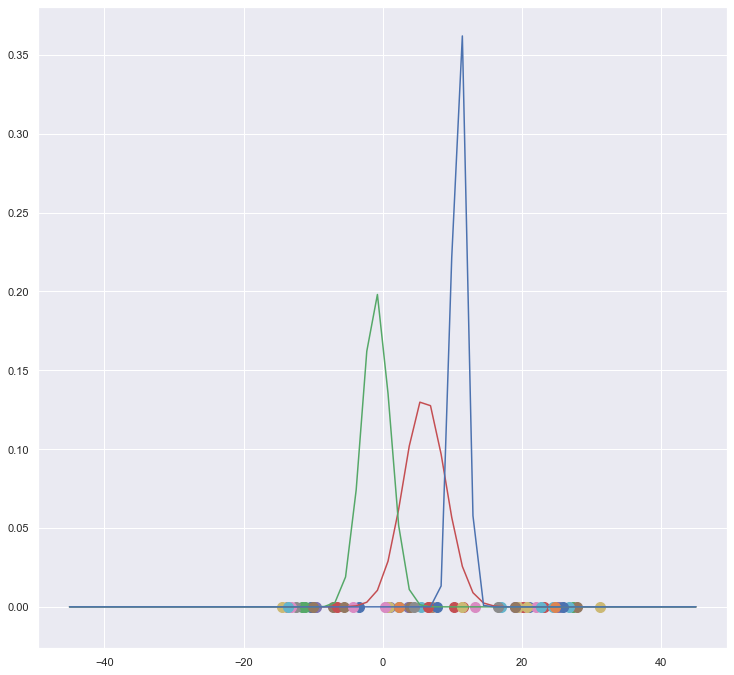

1


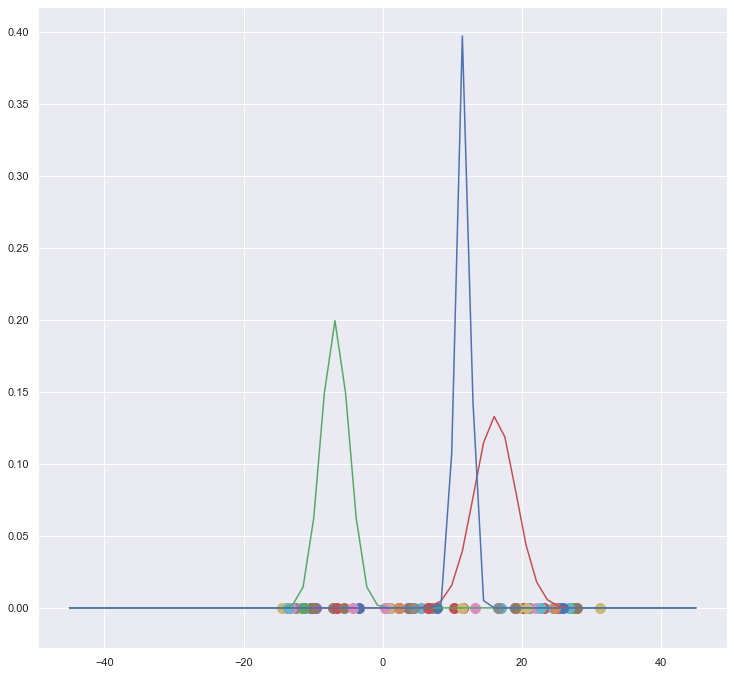

2


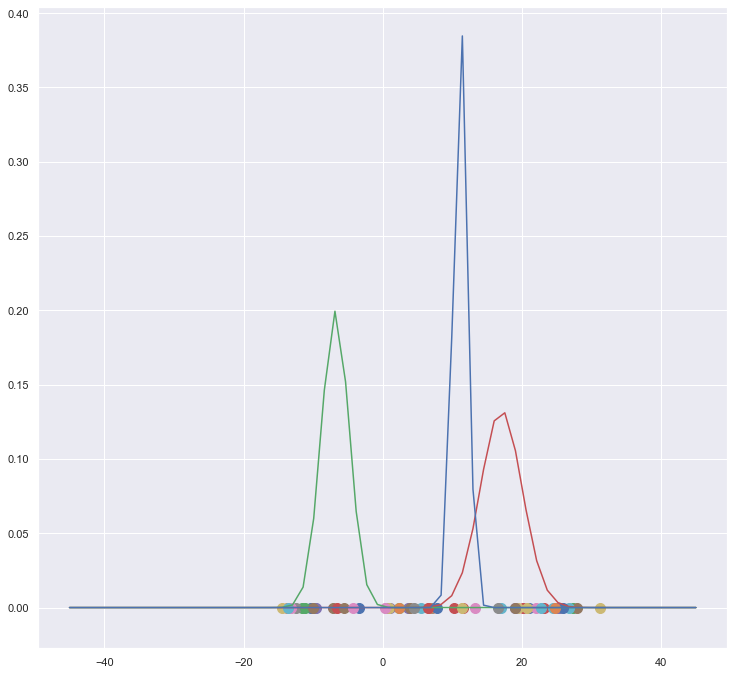

3


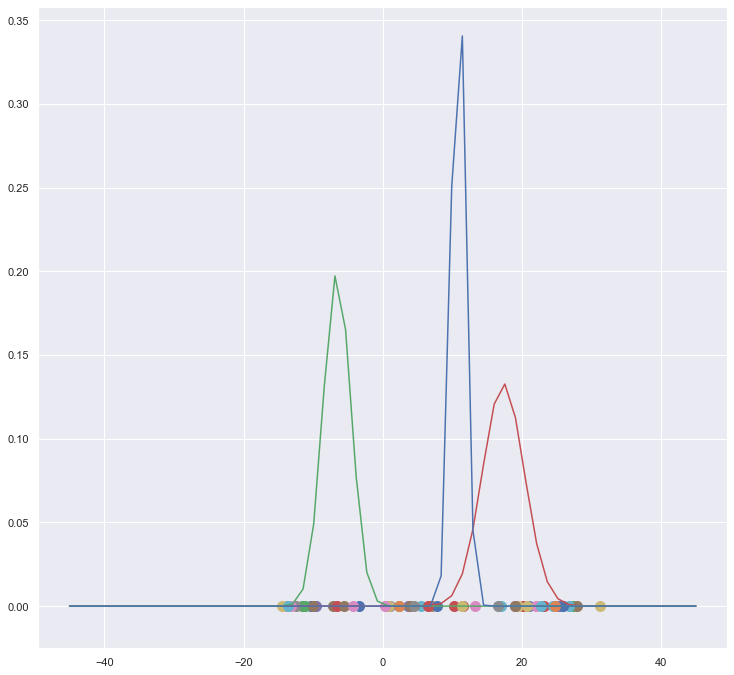

4


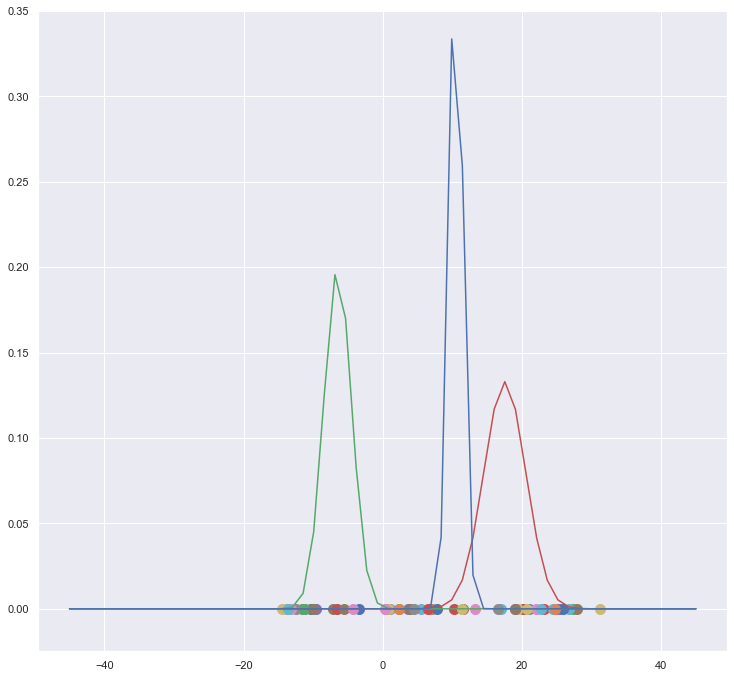

5


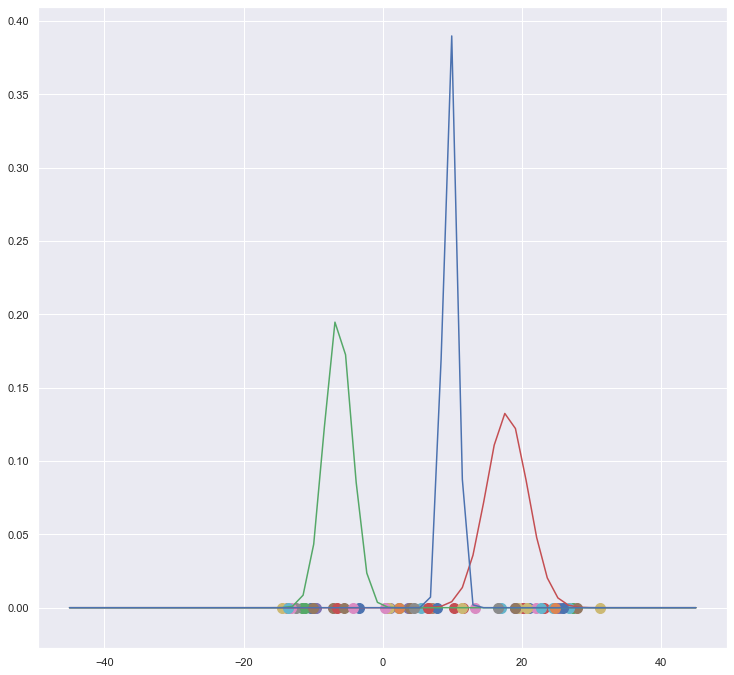

6


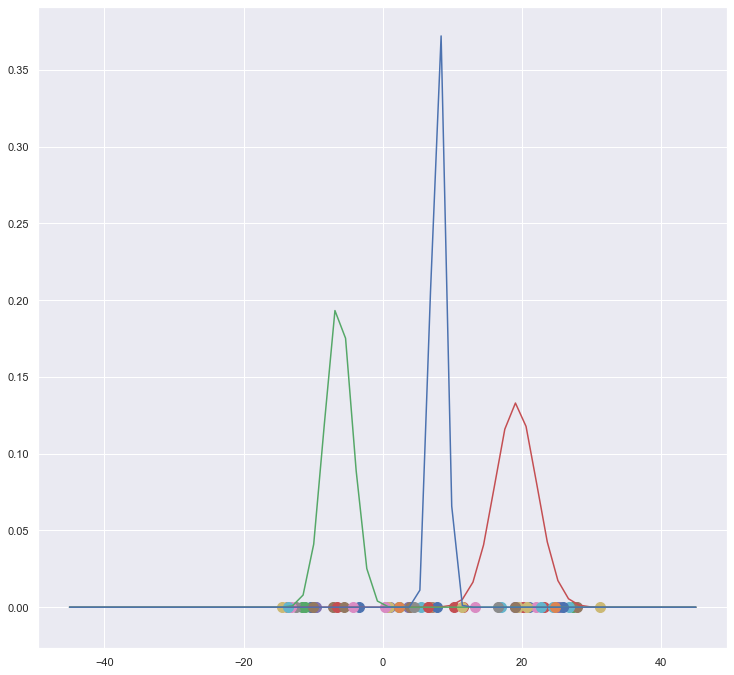

7


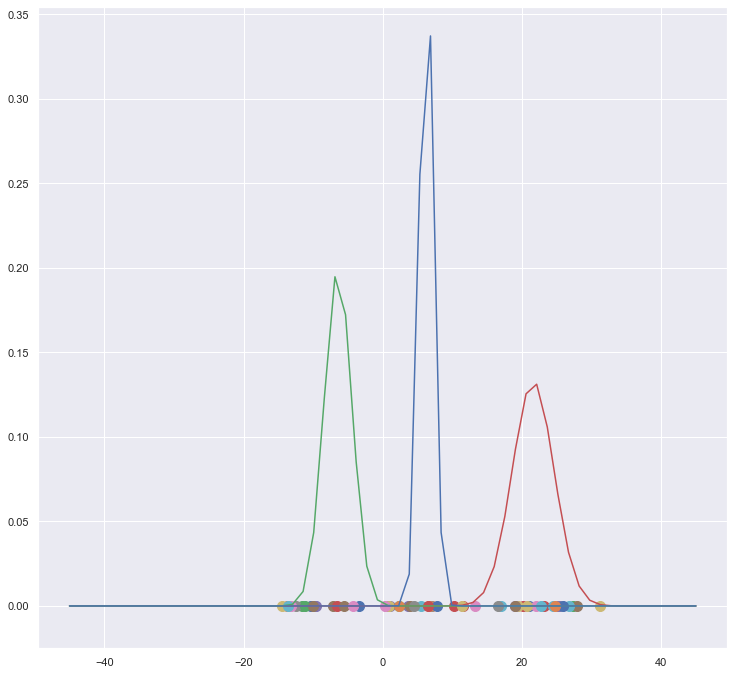

8


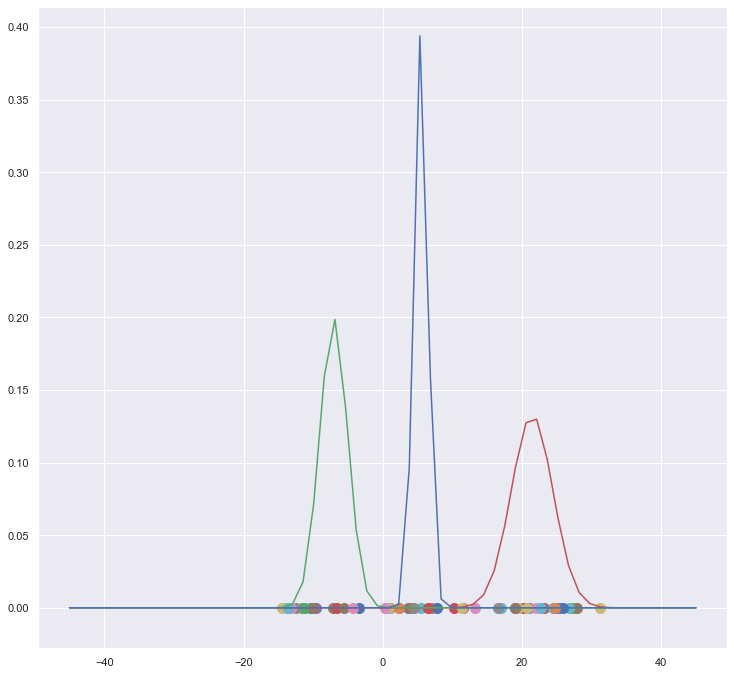

9


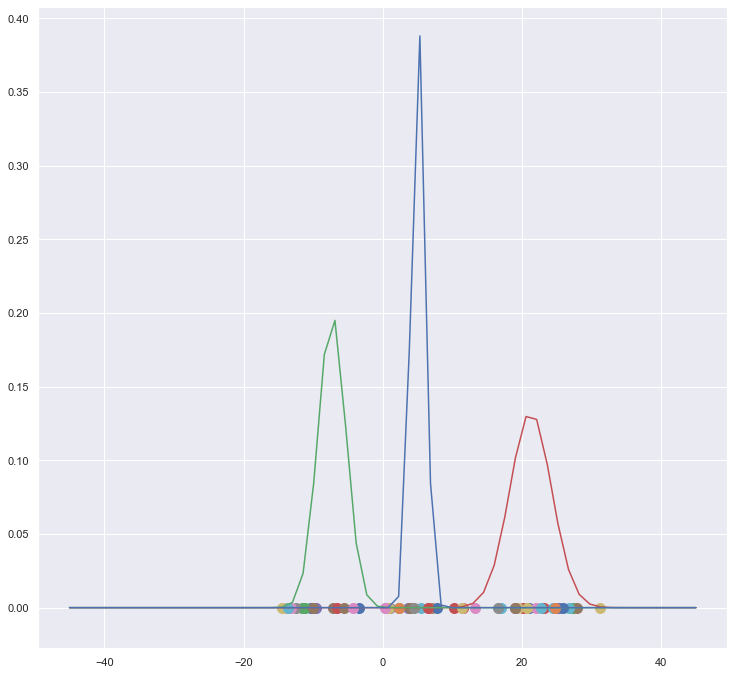

10


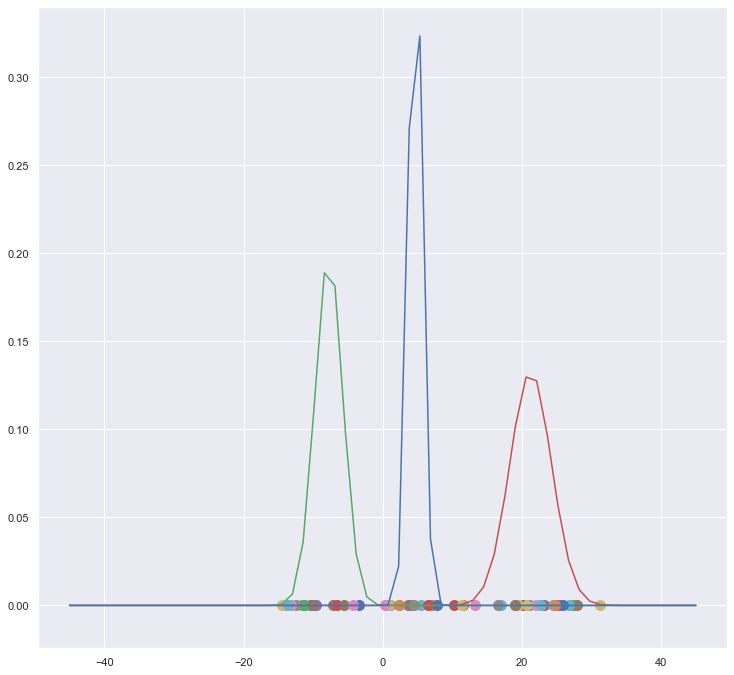

11


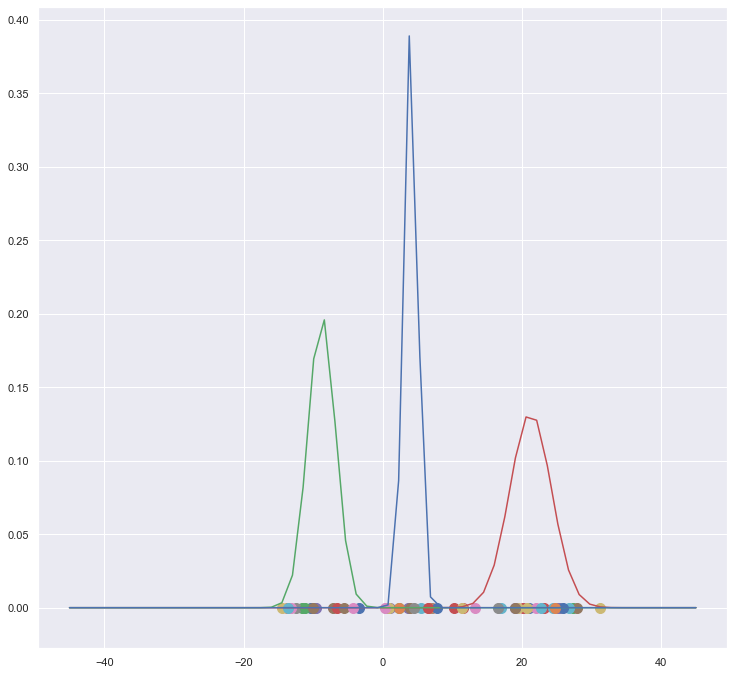

12


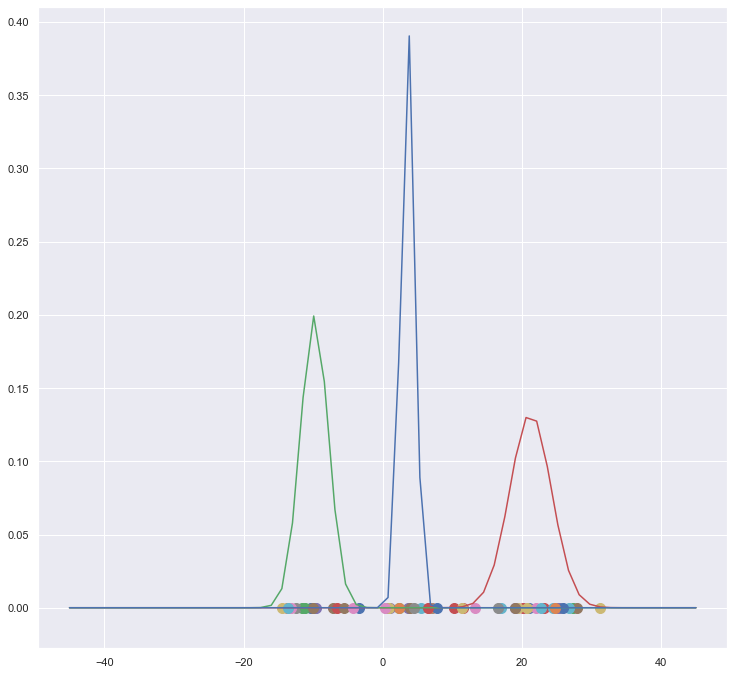

13


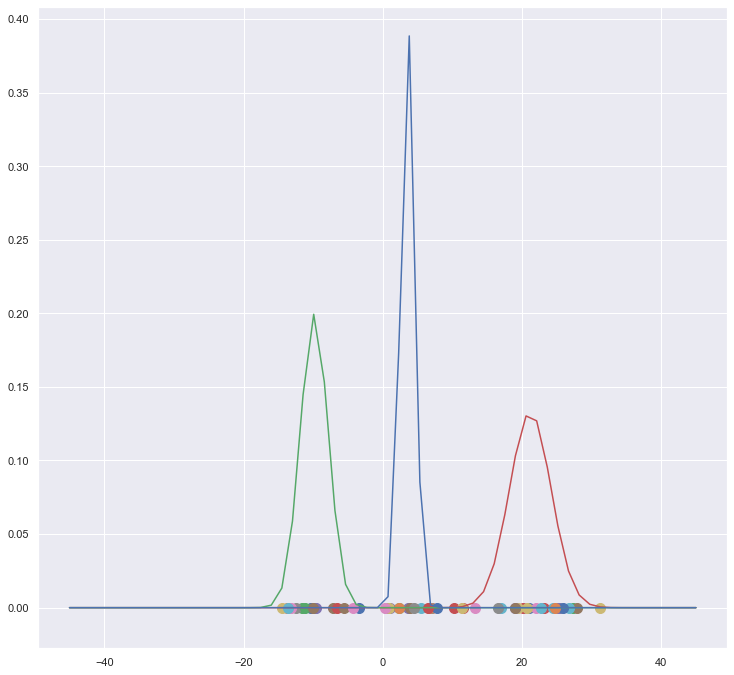

14


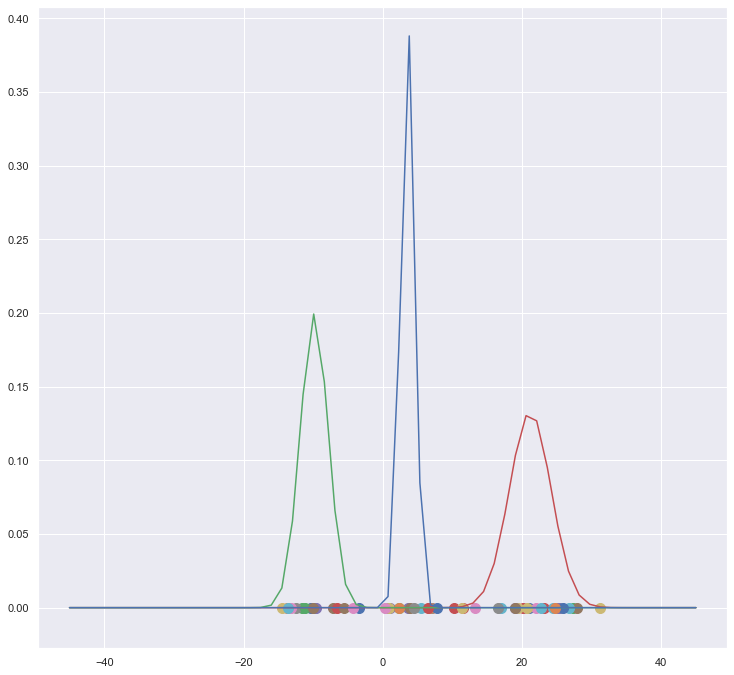

In [467]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import pandas as pd
import pickle
from scipy.stats import norm
import scipy.stats as sp
from matplotlib.axes._axes import _log as matplotlib_axes_logger 
matplotlib_axes_logger.setLevel('ERROR')
np.random.seed(0)

def load(name):
    file = open(name,'rb')
    data = pickle.load(file)
    file.close()
    return data

def save(data,name):
    file = open(name, 'wb')
    pickle.dump(data,file)
    file.close()

class GMM1D:
    def __init__(self,X,iterations,initmean,initprob,initvariance):
    #"""initmean = [a,b,c] initprob=[1/3,1/3,1/3] initvariance=[d,e,f]"""    
        self.iterations = iterations
        self.X = X
        self.mu = initmean
        self.pi = initprob
        self.var = initvariance
        self.curr_log_likelihood=[]
    
    """E step"""

    def calculate_prob(self,r):
        for c,g,p in zip(range(3),[norm(loc=self.mu[0],scale=self.var[0]),
                                       norm(loc=self.mu[1],scale=self.var[1]),norm(loc=self.mu[2],scale=self.var[2])],self.pi):
            r[:,c] = p*g.pdf(self.X)
        """
        Normalize the probabilities such that each row of r sums to 1 and weight it by mu_c == the fraction of points belonging to 
        cluster c
        """
        for i in range(len(r)):
            mixture=(np.sum(self.pi)*np.sum(r,axis=1)[i])
            r[i]=r[i]/mixture
        return r
    #np.array([r[i][0],r[i][1],r[i][2]])
    def plot(self,r):
        fig = plt.figure(figsize=(11,11))
        ax0 = fig.add_subplot(111)
        for i in range(len(r)):
            import itertools
            colors = itertools.cycle(["r", "b", "g"])
            ax0.scatter(self.X[i],0,s=100)
            #ax0.scatter(self.X[i],0,c=np.array([r[i][0],r[i][1],r[i][2]]),s=100)
        """Plot the gaussians"""
        for g,c in zip([norm(loc=self.mu[0],scale=self.var[0]).pdf(np.linspace(-45,45,num=60)),
                        norm(loc=self.mu[1],scale=self.var[1]).pdf(np.linspace(-45,45,num=60)),
                        norm(loc=self.mu[2],scale=self.var[2]).pdf(np.linspace(-45,45,num=60))],['r','g','b']):
            ax0.plot(np.linspace(-45,45,num=60),g,c=c)
    
    def loglikelihood(self):
        logl = 0
        for i in range(len(self.mu)):
            tmp = 0
            for j in range(self.iterations):
                #print(self.sigma_arr[j])
                tmp += sp.multivariate_normal.pdf(self.X[i, :],self.mu[j, :].A1,self.var[j, :]) * self.pi[j]
            logl += np.log(tmp)
        return logl
    
    def run(self):
        for iter in range(self.iterations):
            #print(self.mu,self.var,self.pi)
            """Create the array r with dimensionality nxK"""
            r = np.zeros((len(self.X),3))  

            """
            Probability for each datapoint x_i to belong to gaussian g 
            """
            r = self.calculate_prob(r)


            """Plot the data"""
            print(iter)
            self.plot(r)
            
            """M-Step"""

            """calculate m_c"""
            m_c = []
            # write code here
            length=len(r[0])
            for i in  range(length):
                m_c.append(np.sum(r[:,i]))
            
            """calculate pi_c"""
            pi_c=[]
            # write code here
            for k in range(len(m_c)):
                fraction=m_c[k]
                total=np.sum(m_c)
                self.pi[k]=fraction/total
            
            """calculate mu_c"""
            # write code here
            xlen=len(self.X)
            self.mu = np.sum(self.X.reshape(xlen,1)*r,axis=0)
            self.mu=self.mu/m_c
            #print('mu :',self.mu)

            """calculate var_c"""
            var_c = []
#             for c in range(len(r[0])):
#                  var_c.append((1/m_c[c])*np.dot(((np.array(r[:,c]).reshape(180,1))*(self.X.reshape(len(self.X),1)-self.mu[c])).T,(self.X.reshape(len(self.X),1)-self.mu[c])))#write code here
            length_var=r.shape[1]
            for i in range(length_var):
                x=np.array(r[:,i]).reshape(60,1)
                variance=np.dot(((np.array(r[:,i]).reshape(60,1))*(self.X.reshape(len(self.X),1)-mu_c[i])).T,(self.X.reshape(len(self.X),1)-mu_c[i]))
                variance=variance/m_c[i]
                var_c.append(variance)
            plt.show()
            #logl=self.loglikelihood()
            #print(logl)
                
    def plot_log():
        plt.rcParams["figure.figsize"] = (16,5)
        plt.plot(self.iterations,self.curr_log_likelihood)
        plt.xlabel('number of iterations ---->')
        plt.ylabel('log_likelihoods')
        

#data1=pd.read_pickle('dataset1.pkl')
#data2=pd.read_pickle('dataset2.pkl')
data1=pd.read_pickle('dataset1.pkl')
#data=np.concatenate((data1,data2,data3)).reshape(180)
mean1,mean2,mean3=6,-1,11
var1,var2,var3=3,2,1
g = GMM1D(data3.reshape(60),15,[mean1,mean2,mean3],[1/3,1/3,1/3],[var1,var2,var3])
g.run()


# Plot for Dataset2

0


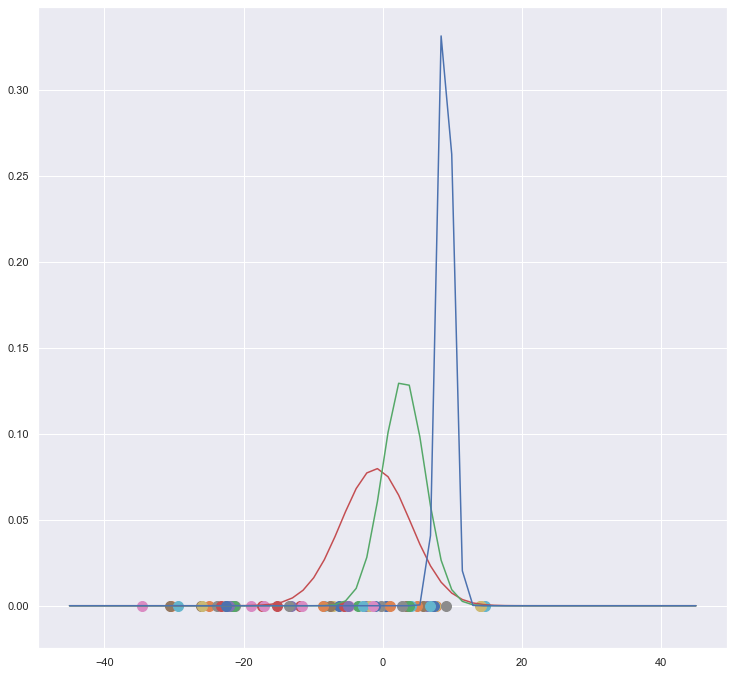

1


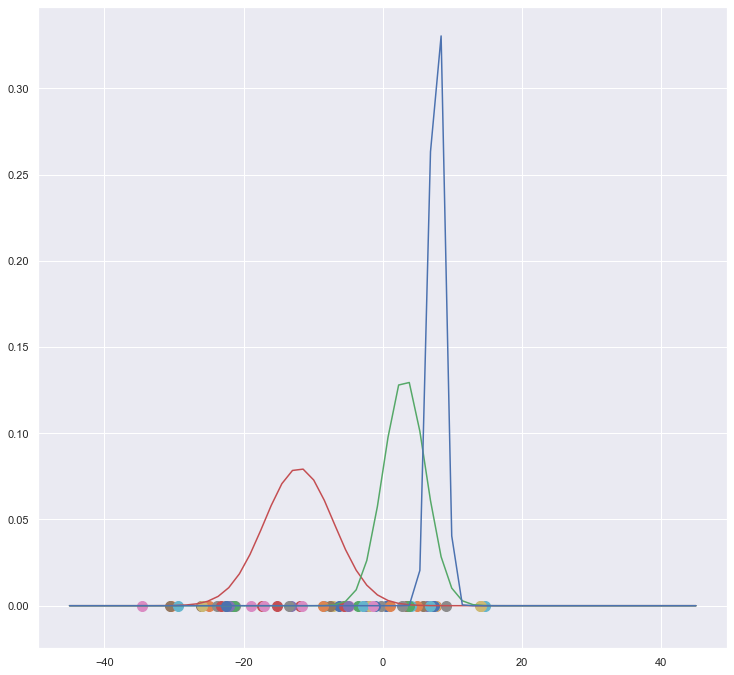

2


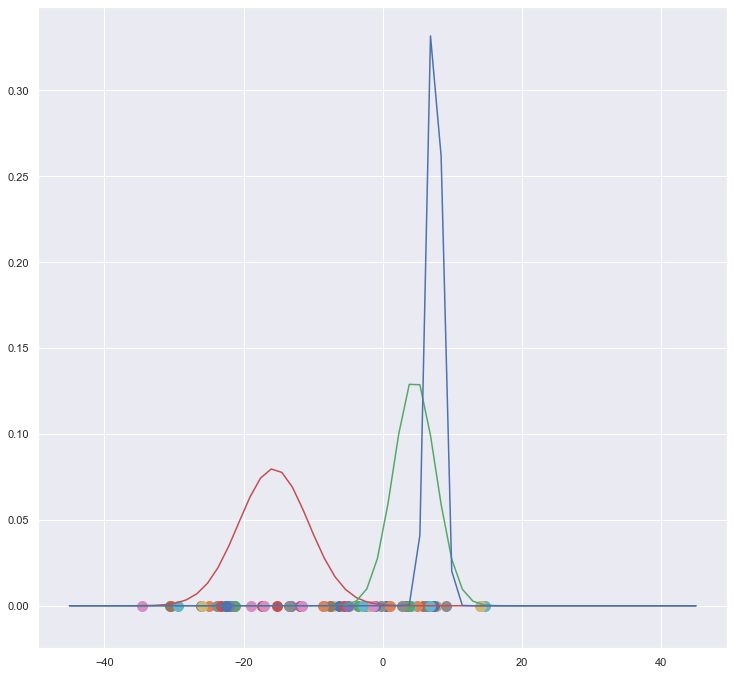

3


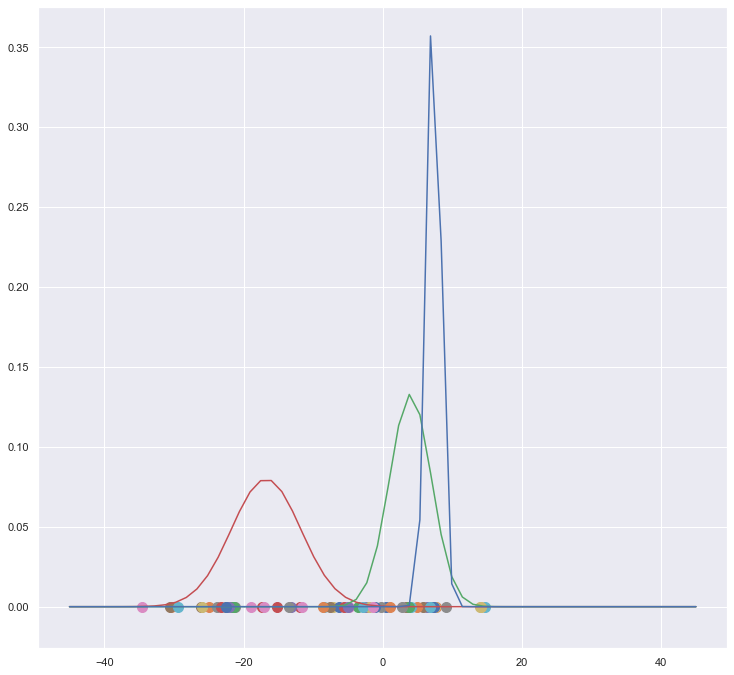

4


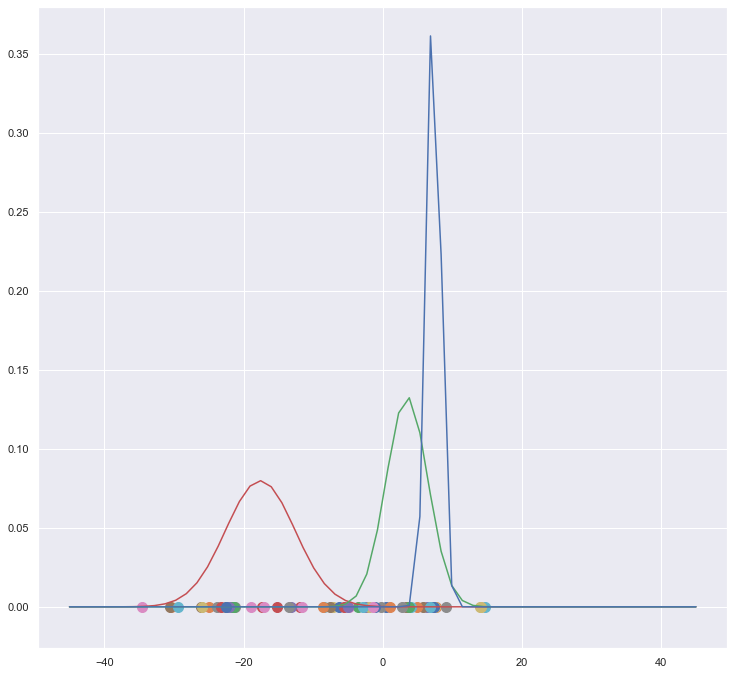

5


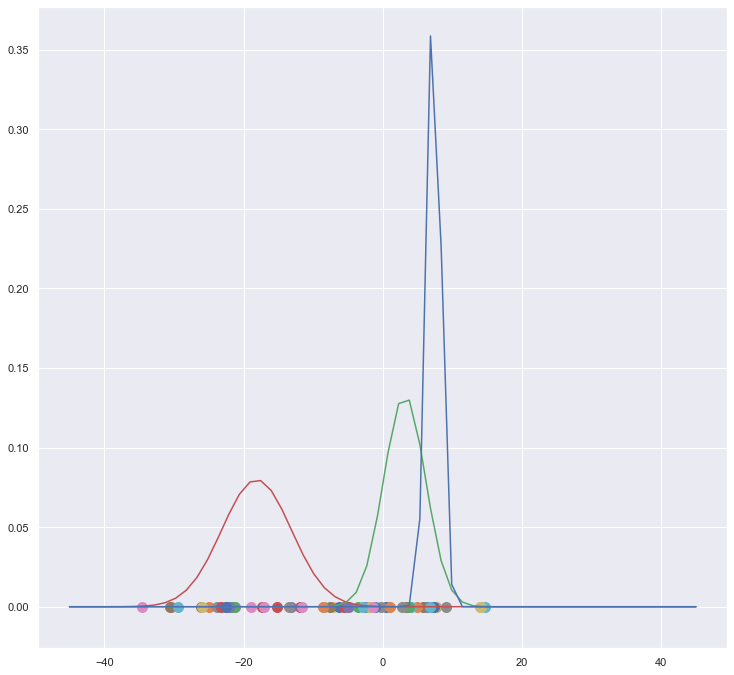

6


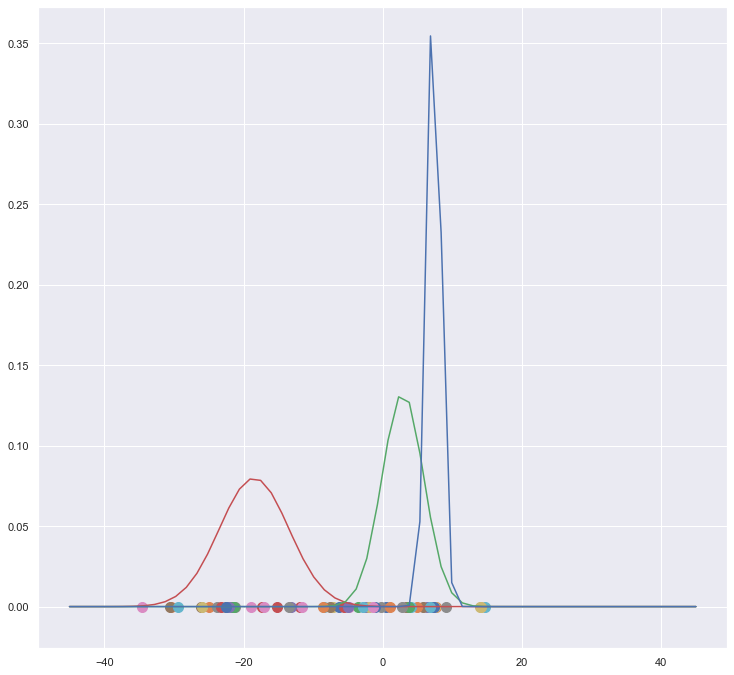

7


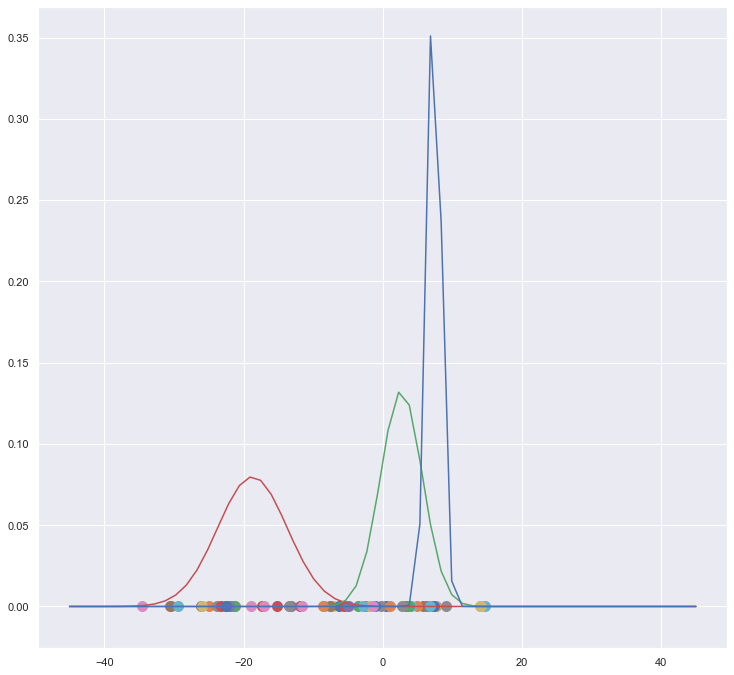

8


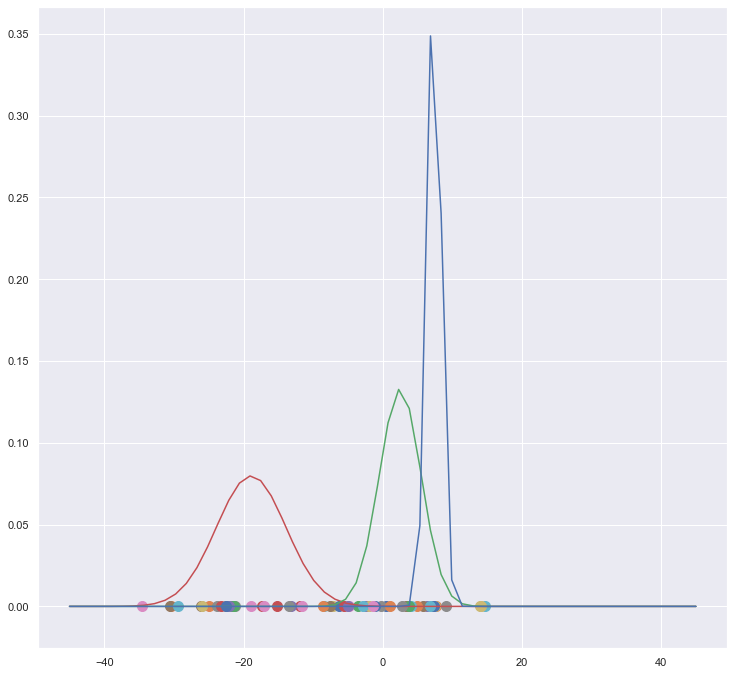

9


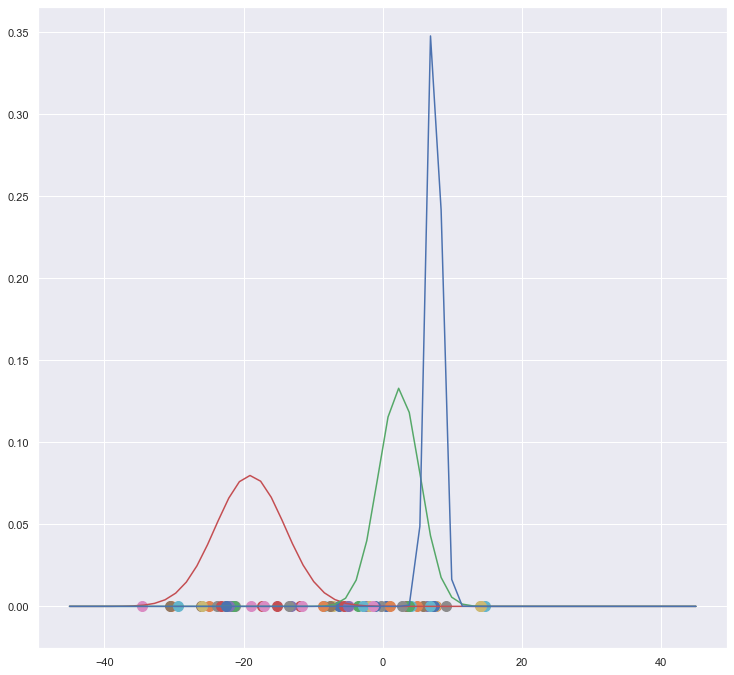

10


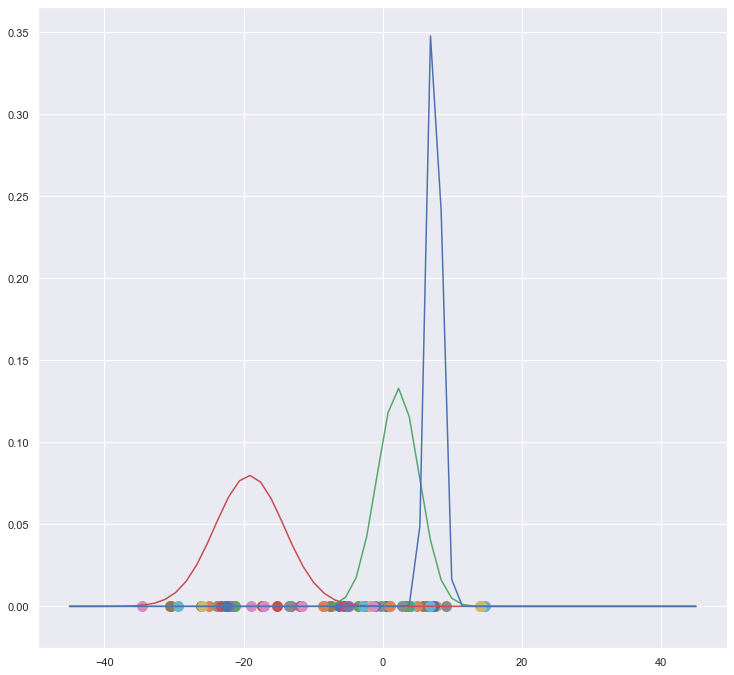

11


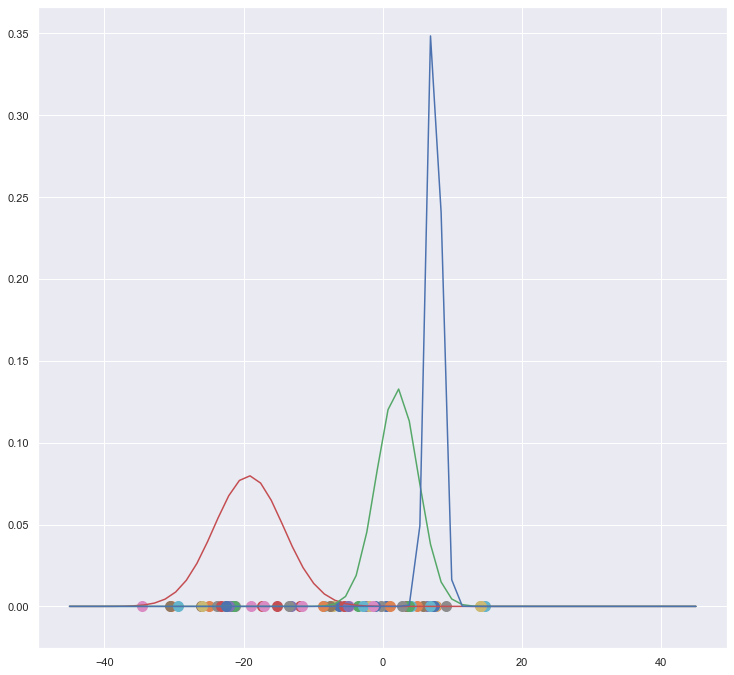

12


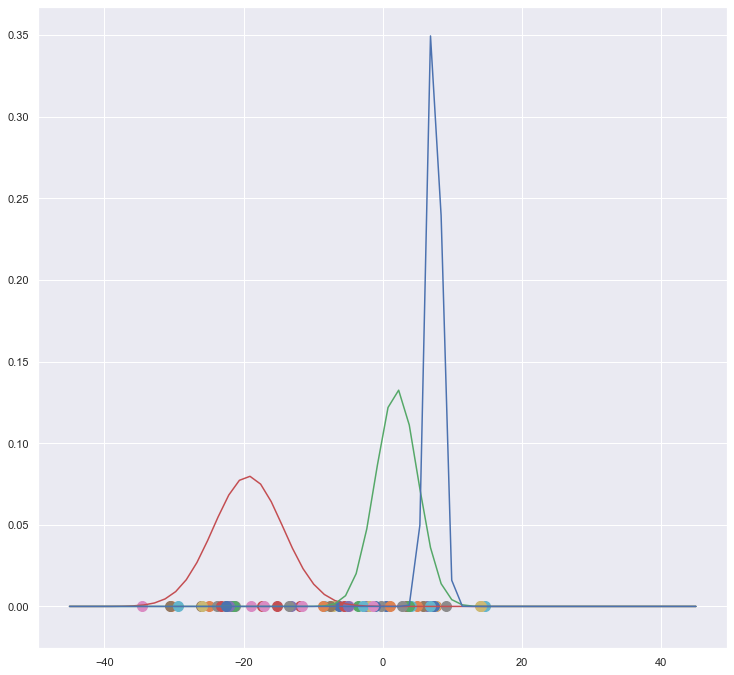

13


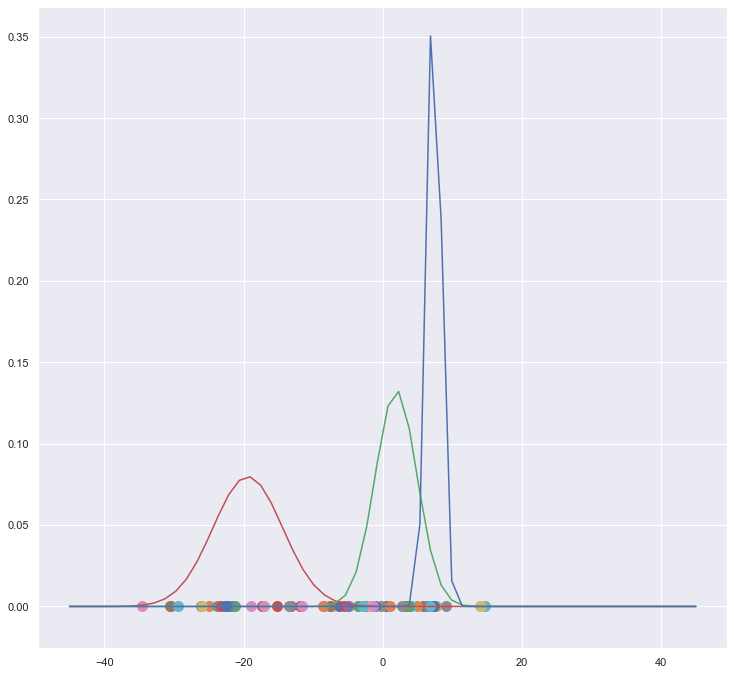

14


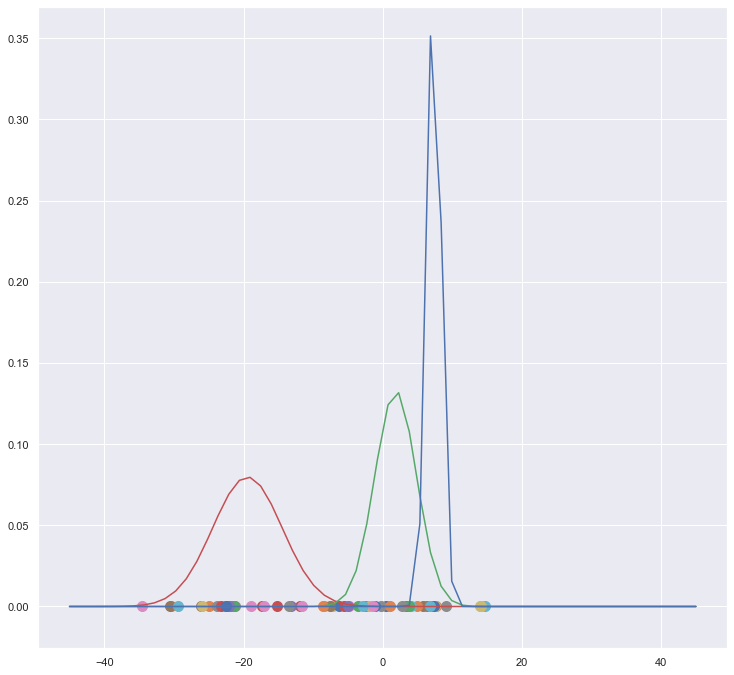

In [469]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import pandas as pd
import pickle
from scipy.stats import norm
from matplotlib.axes._axes import _log as matplotlib_axes_logger 
matplotlib_axes_logger.setLevel('ERROR')
np.random.seed(0)

def load(name):
    file = open(name,'rb')
    data = pickle.load(file)
    file.close()
    return data

def save(data,name):
    file = open(name, 'wb')
    pickle.dump(data,file)
    file.close()

class GMM1D:
    def __init__(self,X,iterations,initmean,initprob,initvariance):
    #"""initmean = [a,b,c] initprob=[1/3,1/3,1/3] initvariance=[d,e,f]"""    
        self.iterations = iterations
        self.X = X
        self.mu = initmean
        self.pi = initprob
        self.var = initvariance
        self.curr_log_likelihood=[]
    
    """E step"""

    def calculate_prob(self,r):
        for c,g,p in zip(range(3),[norm(loc=self.mu[0],scale=self.var[0]),
                                       norm(loc=self.mu[1],scale=self.var[1]),norm(loc=self.mu[2],scale=self.var[2])],self.pi):
            r[:,c] = p*g.pdf(self.X)
        """
        Normalize the probabilities such that each row of r sums to 1 and weight it by mu_c == the fraction of points belonging to 
        cluster c
        """
        for i in range(len(r)):
            mixture=(np.sum(self.pi)*np.sum(r,axis=1)[i])
            r[i]=r[i]/mixture
        return r
    #np.array([r[i][0],r[i][1],r[i][2]])
    def plot(self,r):
        fig = plt.figure(figsize=(11,11))
        ax0 = fig.add_subplot(111)
        for i in range(len(r)):
#             Color = np.array([r[i][0],r[i][1],r[i][2]])
#             rcnt = r.shape[0]
#             ColorsRepeated = np.repeat(np.atleast_2d(Color), rcnt, axis = 0)    
#          cols=[]
 #           if(i<20):
#                cols.append['r']
            ax0.scatter(self.X[i],0,s=100)
        """Plot the gaussians"""
        for g,c in zip([norm(loc=self.mu[0],scale=self.var[0]).pdf(np.linspace(-45,45,num=60)),
                        norm(loc=self.mu[1],scale=self.var[1]).pdf(np.linspace(-45,45,num=60)),
                        norm(loc=self.mu[2],scale=self.var[2]).pdf(np.linspace(-45,45,num=60))],['r','g','b']):
            ax0.plot(np.linspace(-45,45,num=60),g,c=c)
    
    def run(self):
        for iter in range(self.iterations):
            #print(self.mu,self.var,self.pi)
            """Create the array r with dimensionality nxK"""
            r = np.zeros((len(self.X),3))  

            """
            Probability for each datapoint x_i to belong to gaussian g 
            """
            r = self.calculate_prob(r)


            """Plot the data"""
            print(iter)
            self.plot(r)
            
            """M-Step"""

            """calculate m_c"""
            m_c = []
            # write code here
            length=len(r[0])
            for i in  range(length):
                m_c.append(np.sum(r[:,i]))
            
            """calculate pi_c"""
            pi_c=[]
            # write code here
            for k in range(len(m_c)):
                fraction=m_c[k]
                total=np.sum(m_c)
                self.pi[k]=fraction/total
            
            """calculate mu_c"""
            # write code here
            xlen=len(self.X)
            self.mu = np.sum(self.X.reshape(xlen,1)*r,axis=0)
            self.mu=self.mu/m_c
            #print('mu :',self.mu)

            """calculate var_c"""
            var_c = []
#             for c in range(len(r[0])):
#                  var_c.append((1/m_c[c])*np.dot(((np.array(r[:,c]).reshape(180,1))*(self.X.reshape(len(self.X),1)-self.mu[c])).T,(self.X.reshape(len(self.X),1)-self.mu[c])))#write code here
            length_var=r.shape[1]
            for i in range(length_var):
                x=np.array(r[:,i]).reshape(60,1)
                variance=np.dot(((np.array(r[:,i]).reshape(60,1))*(self.X.reshape(len(self.X),1)-mu_c[i])).T,(self.X.reshape(len(self.X),1)-mu_c[i]))
                variance=variance/m_c[i]
                var_c.append(variance)
            plt.show()
    def plot_log():
         self.curr_log_likelihoods.append(np.log(np.sum([k*multivariate_normal(self.mu[i],self.cov[j]).pdf(X) for k,i,j in zip(self.pi,range(len(self.mu)),range(len(self.cov)))])))
        
        

#data1=pd.read_pickle('dataset1.pkl')
data2=pd.read_pickle('dataset2.pkl')
#data3=pd.read_pickle('dataset3.pkl')
#data=np.concatenate((data1,data2,data3)).reshape(180)
mean1,mean2,mean3=-1,3,9
var1,var2,var3=5,3,1
g = GMM1D(data2.reshape(60),15,[mean1,mean2,mean3],[1/3,1/3,1/3],[var1,var2,var3])
g.run()


# Plot for Dataset 3

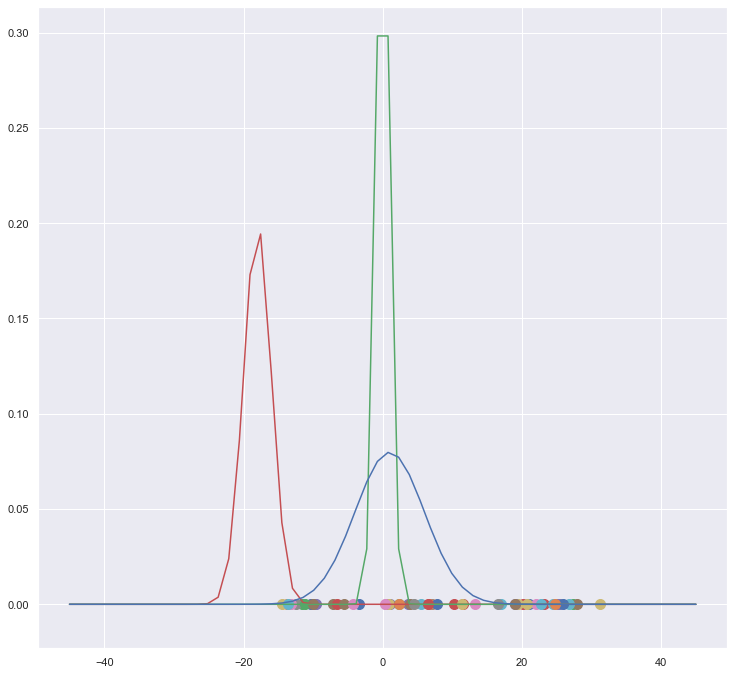

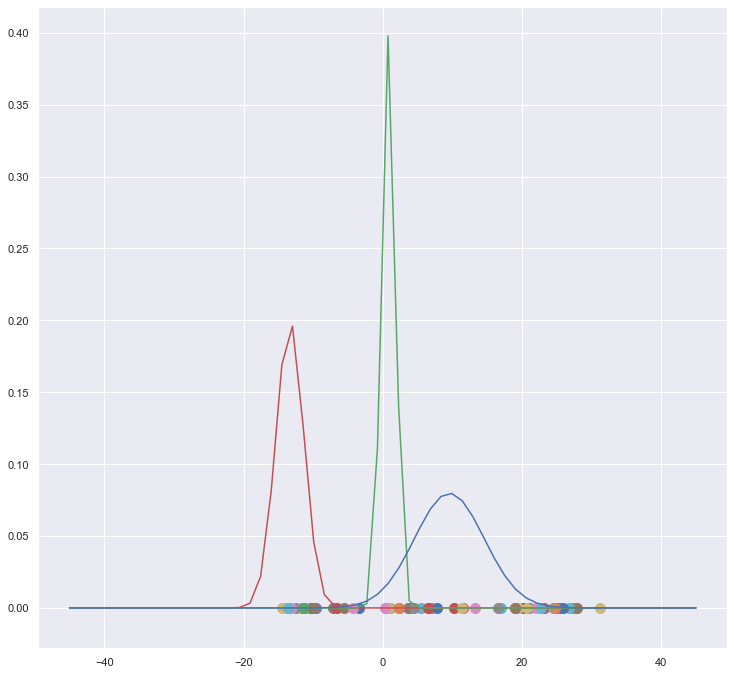

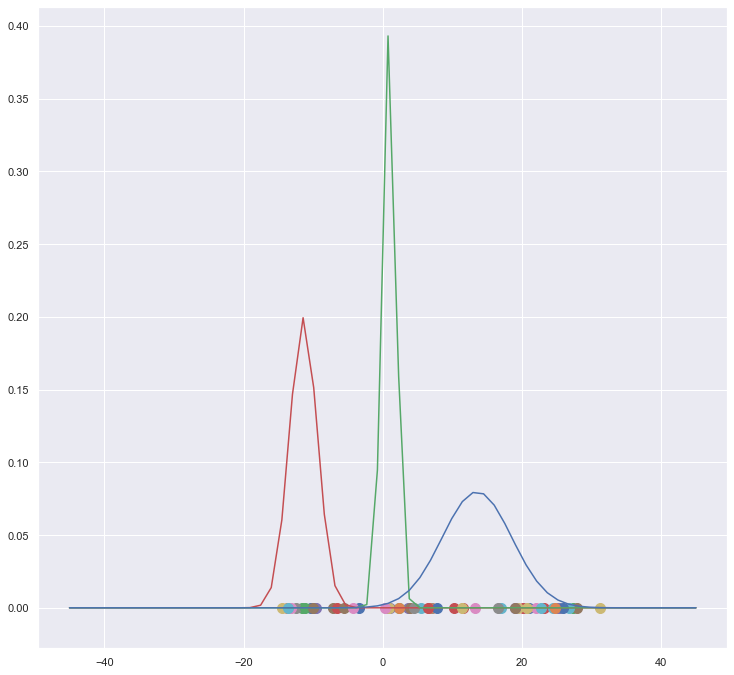

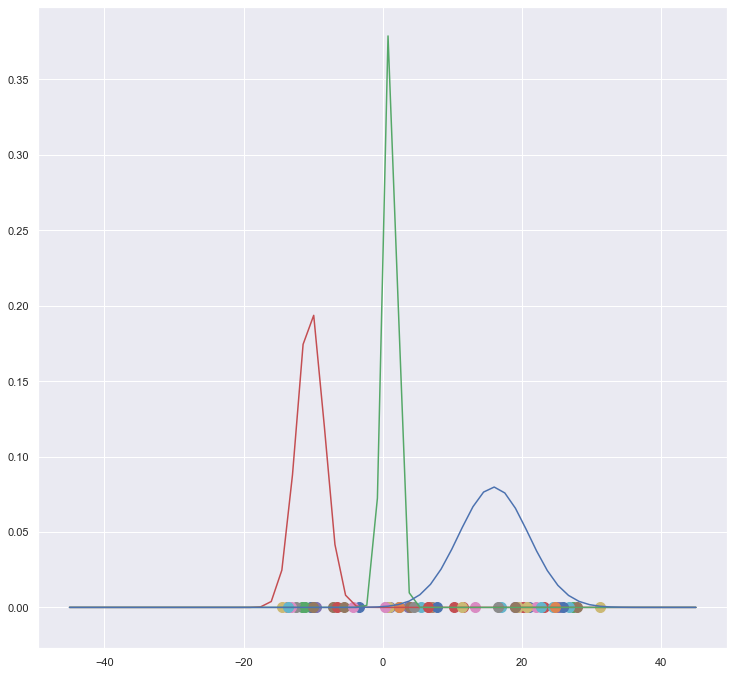

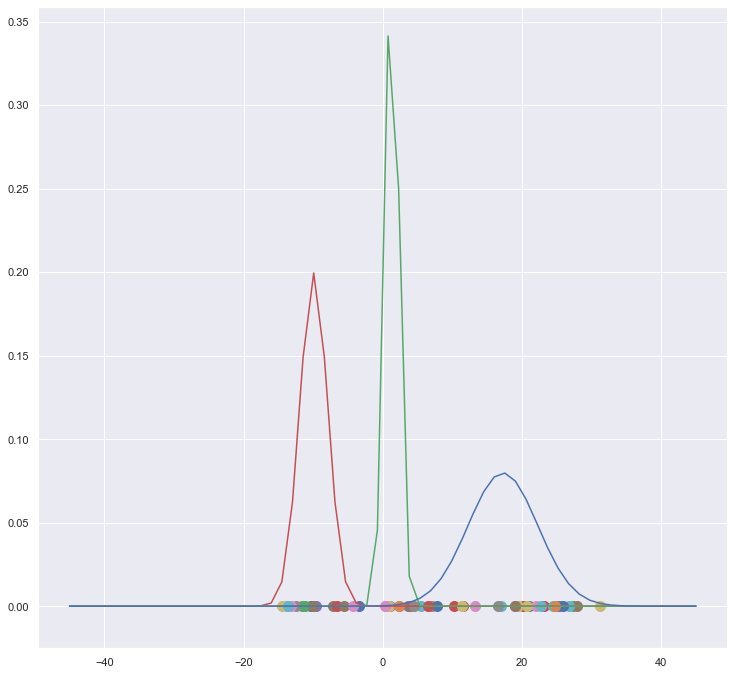

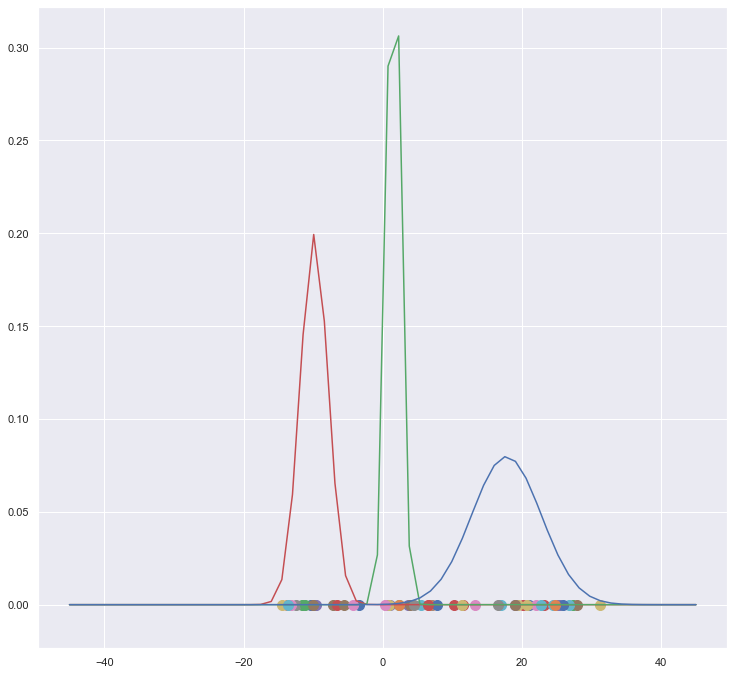

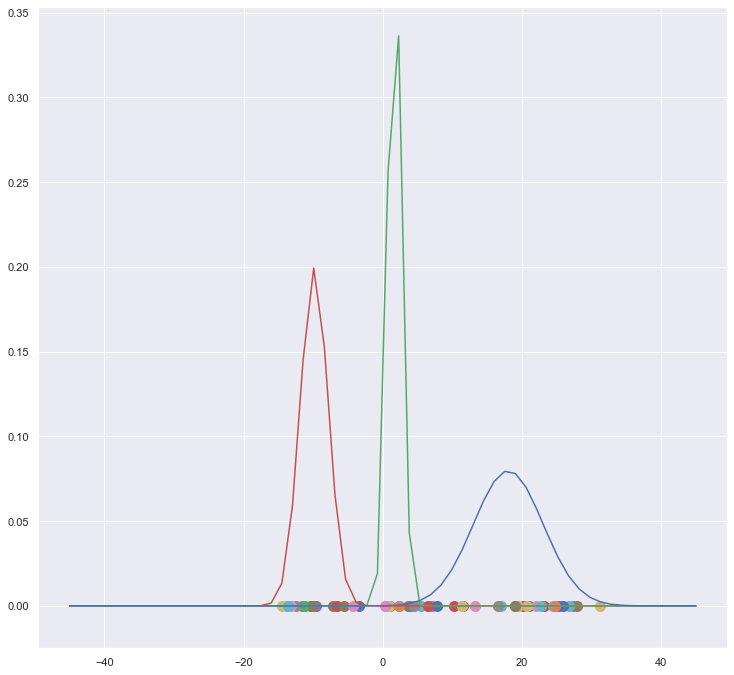

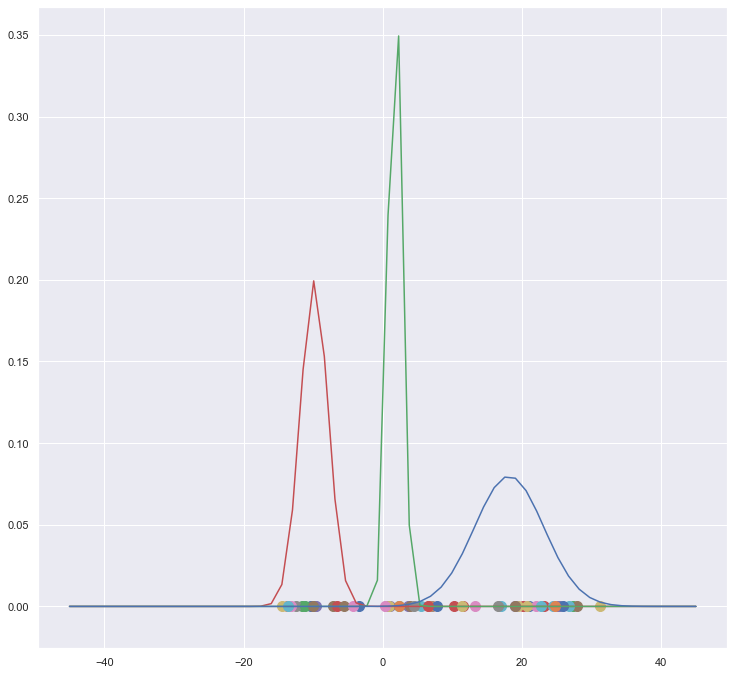

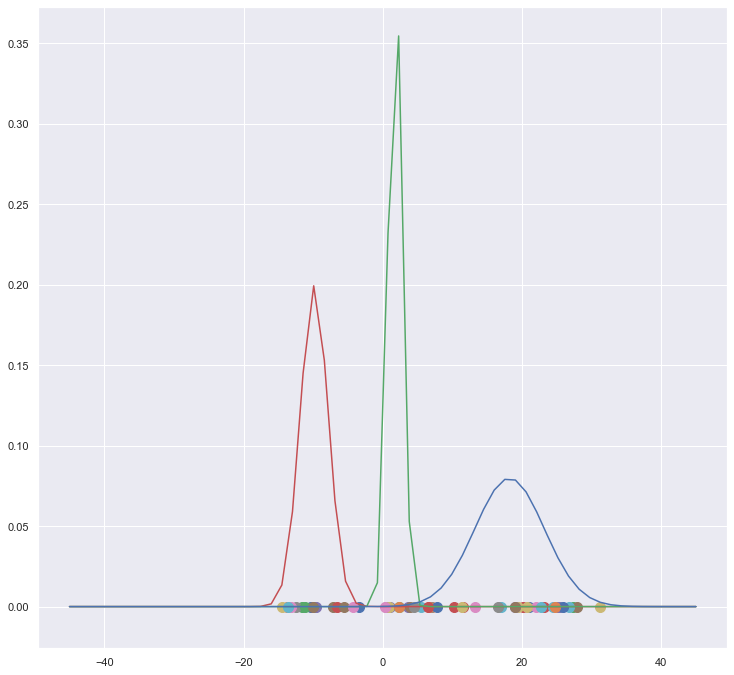

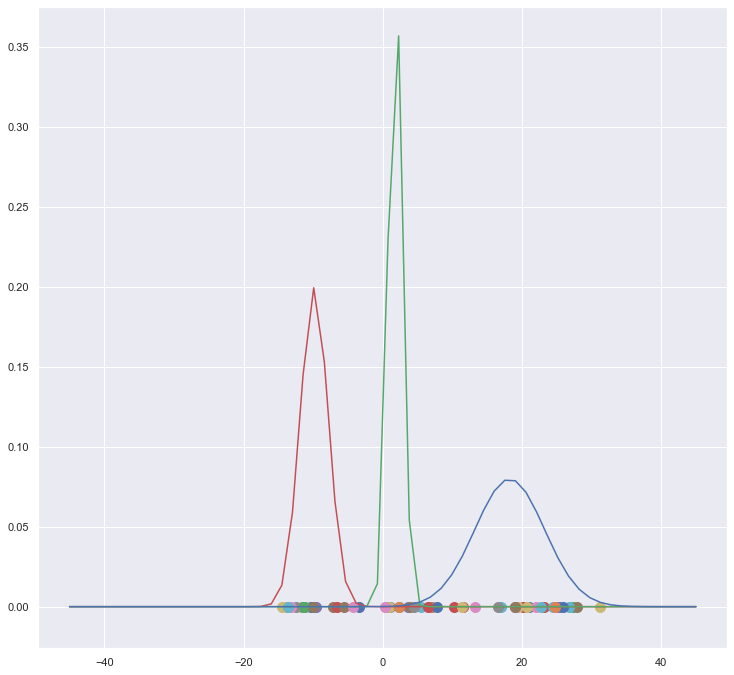

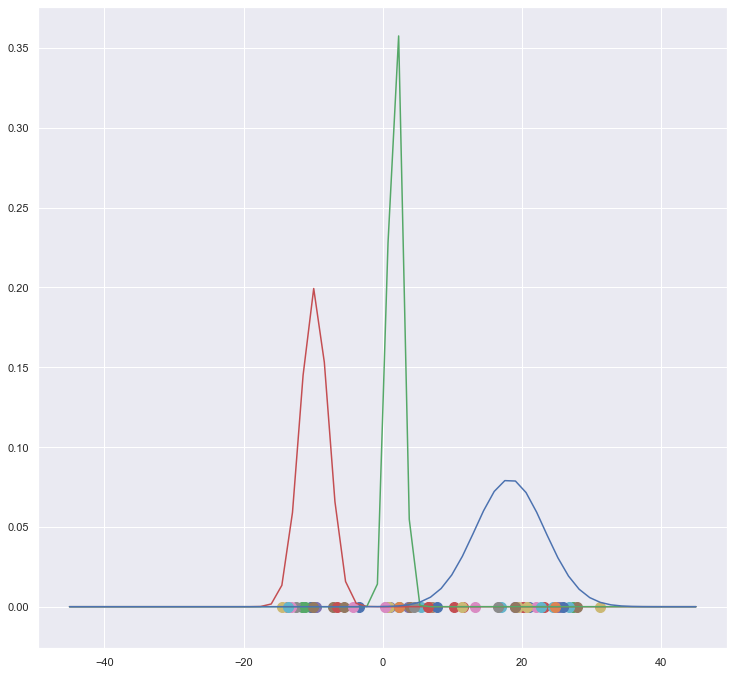

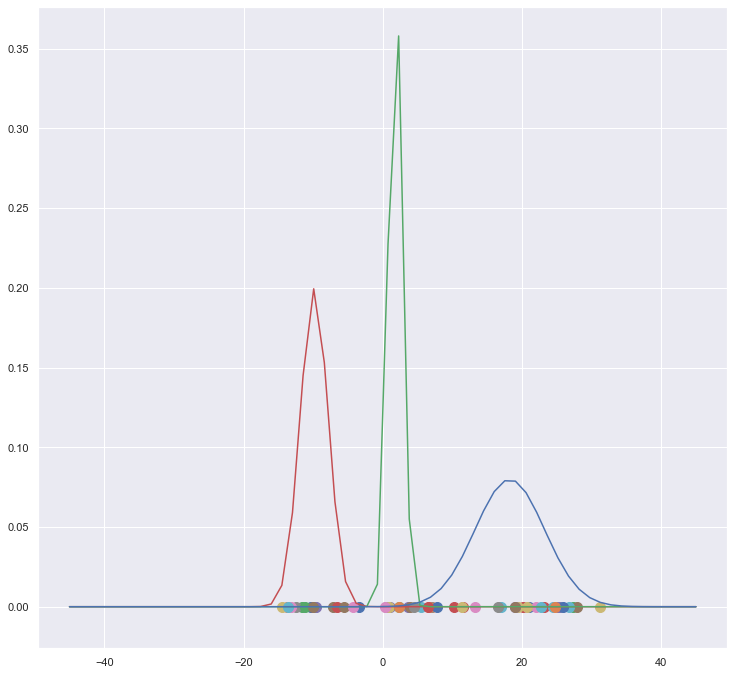

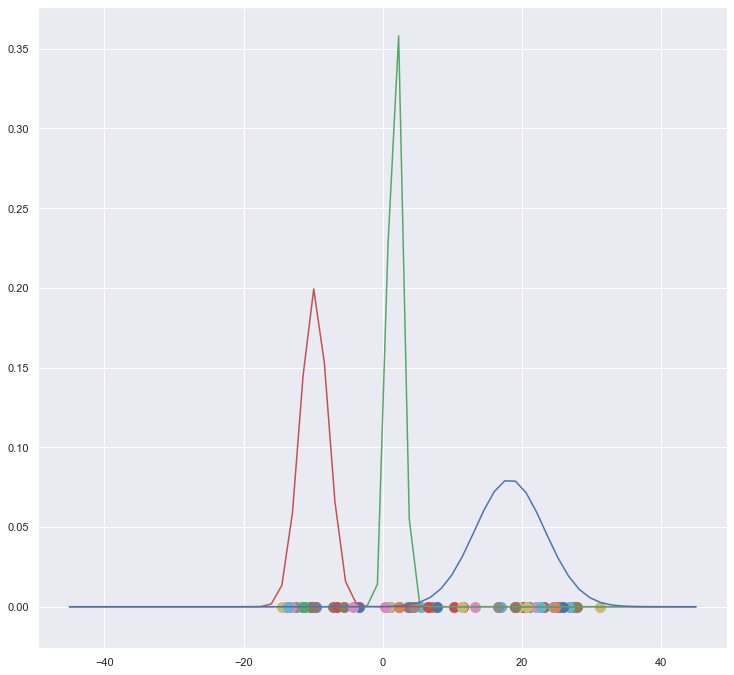

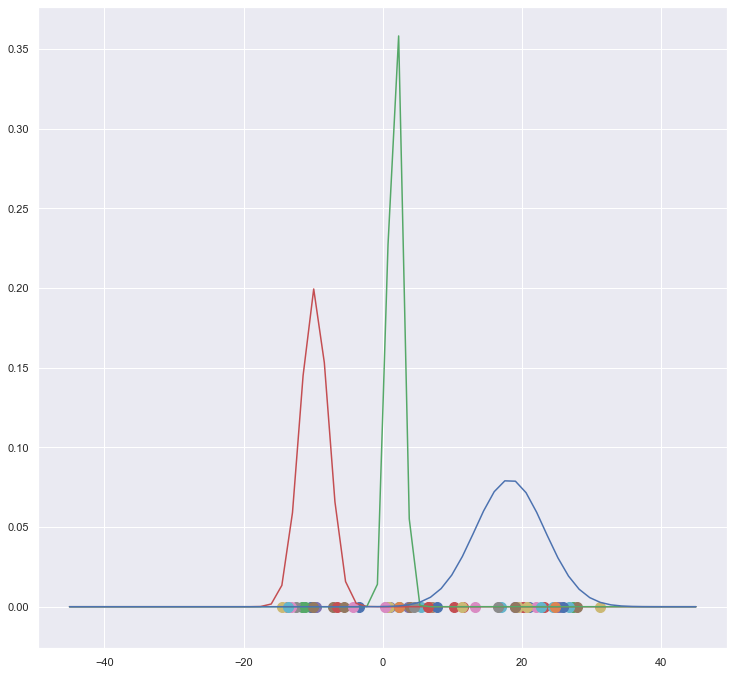

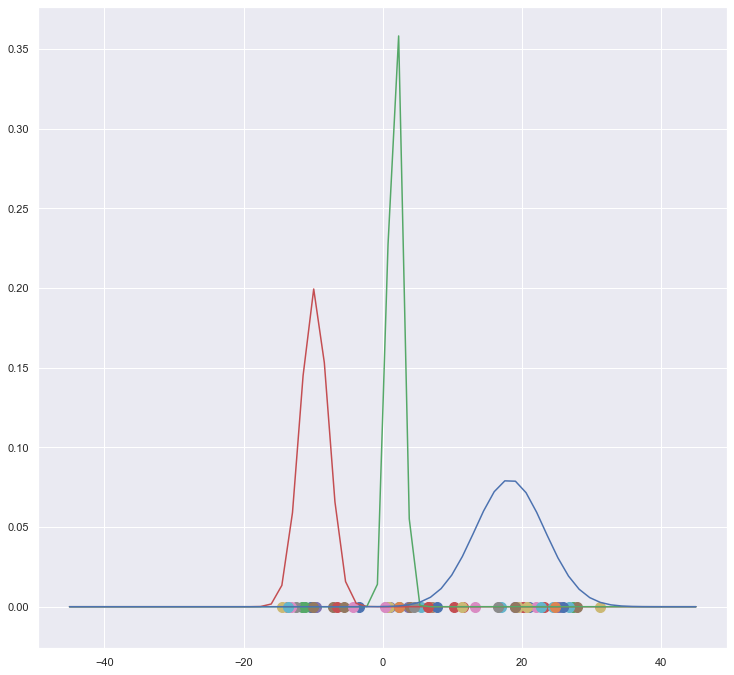

In [471]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import pandas as pd
import pickle
from scipy.stats import norm
from matplotlib.axes._axes import _log as matplotlib_axes_logger 
matplotlib_axes_logger.setLevel('ERROR')
np.random.seed(0)

def load(name):
    file = open(name,'rb')
    data = pickle.load(file)
    file.close()
    return data

def save(data,name):
    file = open(name, 'wb')
    pickle.dump(data,file)
    file.close()

class GMM1D:
    def __init__(self,X,iterations,initmean,initprob,initvariance):
    #"""initmean = [a,b,c] initprob=[1/3,1/3,1/3] initvariance=[d,e,f]"""    
        self.iterations = iterations
        self.X = X
        self.mu = initmean
        self.pi = initprob
        self.var = initvariance
        self.curr_log_likelihood=[]
    
    """E step"""

    def calculate_prob(self,r):
        for c,g,p in zip(range(3),[norm(loc=self.mu[0],scale=self.var[0]),
                                       norm(loc=self.mu[1],scale=self.var[1]),norm(loc=self.mu[2],scale=self.var[2])],self.pi):
            r[:,c] = p*g.pdf(self.X)
        """
        Normalize the probabilities such that each row of r sums to 1 and weight it by mu_c == the fraction of points belonging to 
        cluster c
        """
        for i in range(len(r)):
            mixture=(np.sum(self.pi)*np.sum(r,axis=1)[i])
            r[i]=r[i]/mixture
        return r
    #np.array([r[i][0],r[i][1],r[i][2]])
    def plot(self,r):
        fig = plt.figure(figsize=(11,11))
        ax0 = fig.add_subplot(111)
        for i in range(len(r)):
#             Color = np.array([r[i][0],r[i][1],r[i][2]])
#             rcnt = r.shape[0]
#             ColorsRepeated = np.repeat(np.atleast_2d(Color), rcnt, axis = 0)    
            ax0.scatter(self.X[i],0,s=100)
        """Plot the gaussians"""
        for g,c in zip([norm(loc=self.mu[0],scale=self.var[0]).pdf(np.linspace(-45,45,num=60)),
                        norm(loc=self.mu[1],scale=self.var[1]).pdf(np.linspace(-45,45,num=60)),
                        norm(loc=self.mu[2],scale=self.var[2]).pdf(np.linspace(-45,45,num=60))],['r','g','b']):
            ax0.plot(np.linspace(-45,45,num=60),g,c=c)
    
    def run(self):
        for iter in range(self.iterations):
            #print(self.mu,self.var,self.pi)
            """Create the array r with dimensionality nxK"""
            r = np.zeros((len(self.X),3))  

            """
            Probability for each datapoint x_i to belong to gaussian g 
            """
            r = self.calculate_prob(r)


            """Plot the data"""
            self.plot(r)
            
            """M-Step"""

            """calculate m_c"""
            m_c = []
            # write code here
            length=len(r[0])
            for i in  range(length):
                m_c.append(np.sum(r[:,i]))
            
            """calculate pi_c"""
            pi_c=[]
            # write code here
            for k in range(len(m_c)):
                fraction=m_c[k]
                total=np.sum(m_c)
                self.pi[k]=fraction/total
            
            """calculate mu_c"""
            # write code here
            xlen=len(self.X)
            self.mu = np.sum(self.X.reshape(xlen,1)*r,axis=0)
            self.mu=self.mu/m_c
            #print('mu :',self.mu)

            """calculate var_c"""
            var_c = []
#             for c in range(len(r[0])):
#                  var_c.append((1/m_c[c])*np.dot(((np.array(r[:,c]).reshape(180,1))*(self.X.reshape(len(self.X),1)-self.mu[c])).T,(self.X.reshape(len(self.X),1)-self.mu[c])))#write code here
            length_var=r.shape[1]
            for i in range(length_var):
                x=np.array(r[:,i]).reshape(60,1)
                variance=np.dot(((np.array(r[:,i]).reshape(60,1))*(self.X.reshape(len(self.X),1)-mu_c[i])).T,(self.X.reshape(len(self.X),1)-mu_c[i]))
                variance=variance/m_c[i]
                var_c.append(variance)
            plt.show()
    def plot_log():
         self.curr_log_likelihoods.append(np.log(np.sum([k*multivariate_normal(self.mu[i],self.cov[j]).pdf(X) for k,i,j in zip(self.pi,range(len(self.mu)),range(len(self.cov)))])))
        
        

#data1=pd.read_pickle('dataset1.pkl')
#data2=pd.read_pickle('dataset2.pkl')
data3=pd.read_pickle('dataset3.pkl')
#data=np.concatenate((data1,data2,data3)).reshape(180)
mean1,mean2,mean3=-18,0,1
var1,var2,var3=2,1,5
g = GMM1D(data3.reshape(60),15,[mean1,mean2,mean3],[1/3,1/3,1/3],[var1,var2,var3])
g.run()


# GMM Using sklearn

In [671]:
data1=pd.read_pickle('dataset1.pkl')
data2=pd.read_pickle('dataset2.pkl')
data3=pd.read_pickle('dataset3.pkl')
data1=data1.reshape(60,1)
data2=data2.reshape(60,1)
data3=data3.reshape(60,1)
data1=pd.DataFrame(data=data1)
data2=pd.DataFrame(data=data2)
data3=pd.DataFrame(data=data3)
d1=data1.values
d2=data2.values
d3=data3.values

Initialization 0
Initialization converged: True
means : [[-14.61351474]
 [ 14.82959532]
 [ -0.04735046]]
covars  [[[3.42328799]]

 [[3.5707605 ]]

 [[3.07646263]]]
log likelihood after convergence  -3.1220770670260634
number of iterations for convergence  2


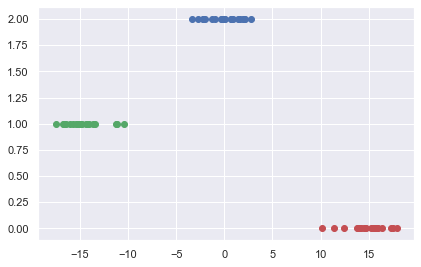

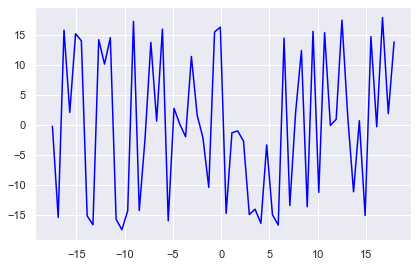

In [672]:
from sklearn.mixture import GaussianMixture
from matplotlib.pyplot import *
gmm1 = GaussianMixture(n_components=3,max_iter=10,verbose=1)
#data1=(data1.reshape(60,1))

gmm1.fit(data1)
labels=gmm.predict(data1)
data1['labels']=(labels)
print('means :',gmm1.means_)
print('covars ',gmm1.covariances_)
print('log likelihood after convergence ',gmm1.lower_bound_)
print('number of iterations for convergence ',gmm1.n_iter_)


c0=data1[(data1['labels'])==0]
c1=data1[(data1['labels'])==1]
c2=data1[(data1['labels'])==2]
plt.scatter(c0[0],c0.labels.values,c='r')
plt.scatter(c1[0],c1.labels.values,c='g')
plt.scatter(c2[0],c2.labels.values,c='b')

x = np.linspace(np.min(d1), np.max(d1), len(d1))

# Plot the data to which the GMM is being fitted
figure()
plot(x, d1, color='blue')

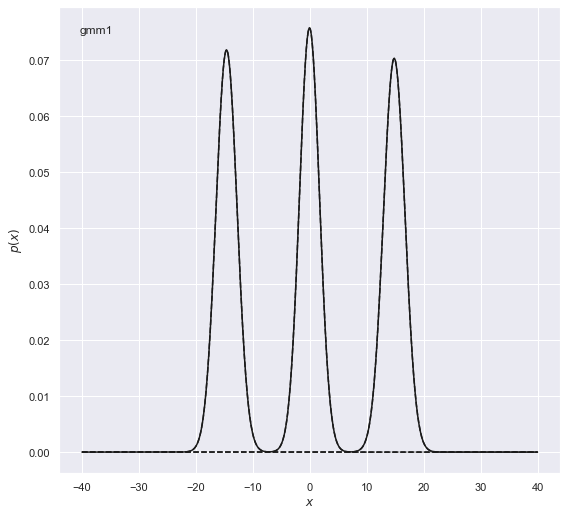

In [660]:
fig = plt.figure(figsize=(8, 8))
# fig.subplots_adjust(left=0.12, right=0.97,
#                     bottom=0.21, top=0.9, wspace=0.5)
ax = fig.add_subplot()
x = np.linspace(-40, 40, 1000)
logprob = gmm1.score_samples(x.reshape(-1, 1))
responsibilities = gmm1.predict_proba(x.reshape(-1, 1))
pdf = np.exp(logprob)
#print(pdf)
pdf_individual = responsibilities * pdf[:, np.newaxis]
ax.plot(x, pdf, '-k')
ax.plot(x, pdf_individual, '--k')
ax.text(0.04, 0.96, "gmm1",
        ha='left', va='top', transform=ax.transAxes)
ax.set_xlabel('$x$')
ax.set_ylabel('$p(x)$')
plt.show()

posterior probabilities for each component

Text(3, 0.3, 'class 2')

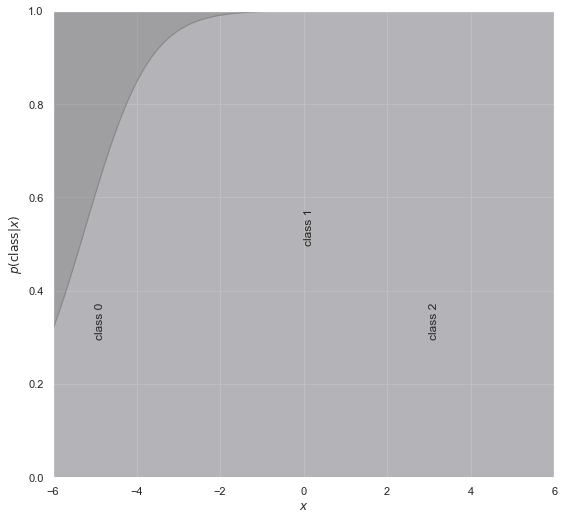

In [681]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot()

p = responsibilities
p = p[:, (1, 0, 2)]  # rearrange order so the plot looks better
p = p.cumsum(1).T

ax.fill_between(x, 0, p[0], color='gray', alpha=0.3)
ax.fill_between(x, p[0], p[1], color='gray', alpha=0.5)
ax.fill_between(x, p[1], 1, color='gray', alpha=0.7)
ax.set_xlim(-6, 6)
ax.set_ylim(0, 1)
ax.set_xlabel('$x$')
ax.set_ylabel(r'$p({\rm class}|x)$')

ax.text(-5, 0.3, 'class 0', rotation='vertical')
ax.text(0, 0.5, 'class 1', rotation='vertical')
ax.text(3, 0.3, 'class 2', rotation='vertical')

Initialization 0
Initialization converged: True
means : [[-22.82092275]
 [  6.27511876]
 [ -4.52060463]]
covars  [[[29.65808121]]

 [[22.07537107]]

 [[23.73973697]]]
log likelihood after convergence  -3.8664937875917933
number of iterations for convergence  5


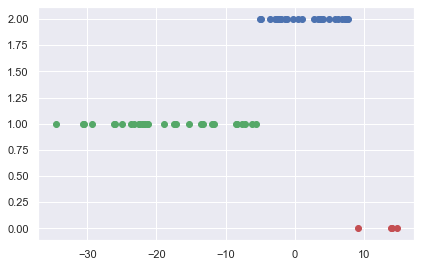

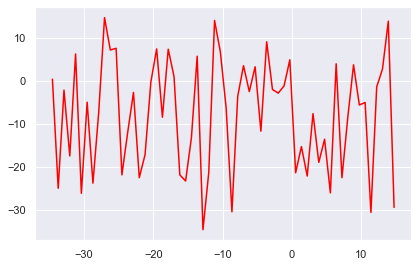

In [662]:
from sklearn.mixture import GaussianMixture
gmm2 = GaussianMixture(n_components=3,max_iter=10,verbose=1)
#data1=(data1.reshape(60,1))
gmm2.fit(data2)
labels2=gmm.predict(data2)

data2['labels']=(labels2)
print('means :',gmm2.means_)
print('covars ',gmm2.covariances_)
print('log likelihood after convergence ',gmm2.lower_bound_)
print('number of iterations for convergence ',gmm2.n_iter_)
c02=data2[(data2['labels'])==0]
c12=data2[(data2['labels'])==1]
c22=data2[(data2['labels'])==2]

plt.scatter(c02[0],c02.labels.values,c='r')
plt.scatter(c12[0],c12.labels.values,c='g')
plt.scatter(c22[0],c22.labels.values,c='b')


x = np.linspace(np.min(d2), np.max(d2), len(d2))

# Plot the data to which the GMM is being fitted
figure()
plot(x, d2, color='red')

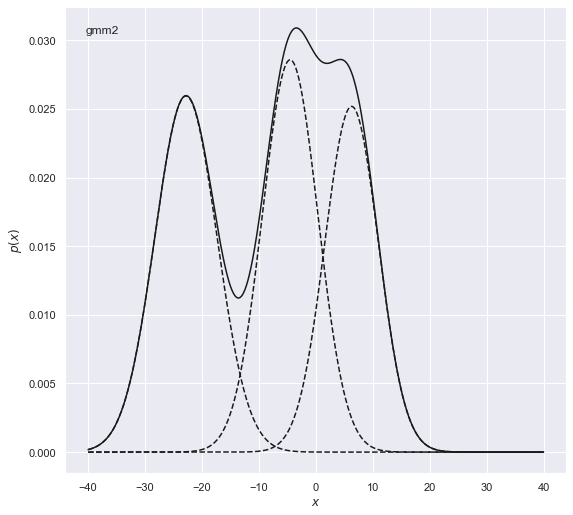

In [674]:
fig = plt.figure(figsize=(8, 8))
# fig.subplots_adjust(left=0.12, right=0.97,
#                     bottom=0.21, top=0.9, wspace=0.5)
ax = fig.add_subplot()
x = np.linspace(-40, 40, 1000)
logprob = gmm2.score_samples(x.reshape(-1, 1))
responsibilities = gmm2.predict_proba(x.reshape(-1, 1))
pdf = np.exp(logprob)
#print(pdf)
pdf_individual = responsibilities * pdf[:, np.newaxis]
ax.plot(x, pdf, '-k')
ax.plot(x, pdf_individual, '--k')
ax.text(0.04, 0.96, "gmm2",
        ha='left', va='top', transform=ax.transAxes)
ax.set_xlabel('$x$')
ax.set_ylabel('$p(x)$')
plt.show()

posterior probabilities for each component

Text(3, 0.3, 'class 2')

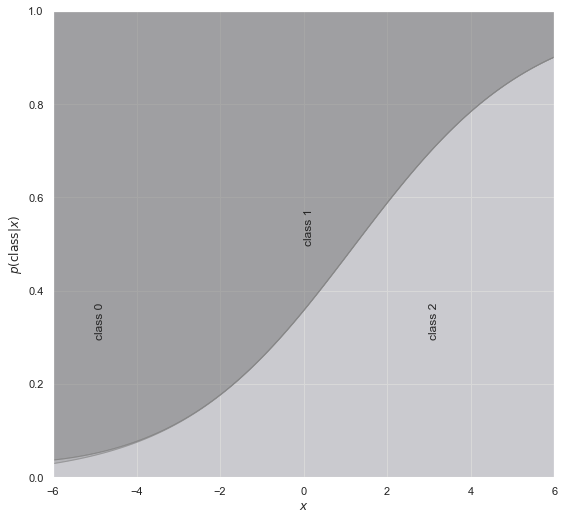

In [676]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot()

p = responsibilities
p = p[:, (1, 0, 2)]  # rearrange order so the plot looks better
p = p.cumsum(1).T

ax.fill_between(x, 0, p[0], color='gray', alpha=0.3)
ax.fill_between(x, p[0], p[1], color='gray', alpha=0.5)
ax.fill_between(x, p[1], 1, color='gray', alpha=0.7)
ax.set_xlim(-6, 6)
ax.set_ylim(0, 1)
ax.set_xlabel('$x$')
ax.set_ylabel(r'$p({\rm class}|x)$')

ax.text(-5, 0.3, 'class 0', rotation='vertical')
ax.text(0, 0.5, 'class 1', rotation='vertical')
ax.text(3, 0.3, 'class 2', rotation='vertical')

Initialization 0
Initialization converged: True
means : [[  4.1245568 ]
 [ 22.99327882]
 [-10.63740382]]
covars  [[[23.79986478]]

 [[15.39916875]]

 [[ 6.59732135]]]
log likelihood after convergence  -3.76780720293324
number of iterations for convergence  7


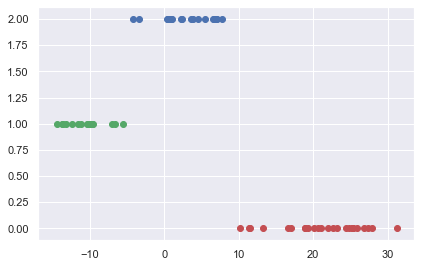

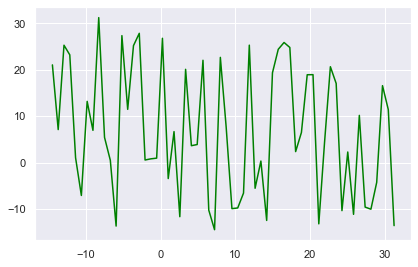

In [677]:
from sklearn.mixture import GaussianMixture
gmm3 = GaussianMixture(n_components=3,max_iter=10,verbose=1)
#data1=(data1.reshape(60,1))
gmm3.fit(data3)
labels3=gmm.predict(data3)
data3['labels']=(labels3)
print('means :',gmm3.means_)
print('covars ',gmm3.covariances_)
print('log likelihood after convergence ',gmm3.lower_bound_)
print('number of iterations for convergence ',gmm3.n_iter_)

c03=data3[(data3['labels'])==0]
c13=data3[(data3['labels'])==1]
c23=data3[(data3['labels'])==2]
plt.scatter(c03[0],c03.labels.values,c='r')
plt.scatter(c13[0],c13.labels.values,c='g')
plt.scatter(c23[0],c23.labels.values,c='b')


x = np.linspace(np.min(d3), np.max(d3), len(d3))

# Plot the data to which the GMM is being fitted
figure()
plot(x, d3, color='green')


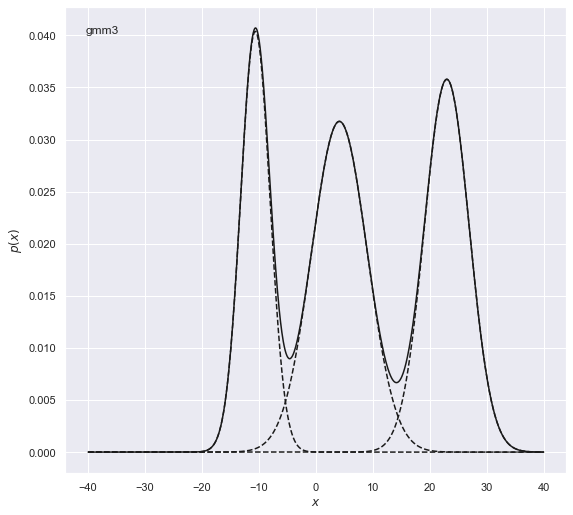

In [678]:
fig = plt.figure(figsize=(8, 8))
# fig.subplots_adjust(left=0.12, right=0.97,
#                     bottom=0.21, top=0.9, wspace=0.5)
ax = fig.add_subplot()
x = np.linspace(-40, 40, 1000)
logprob = gmm3.score_samples(x.reshape(-1, 1))
responsibilities = gmm3.predict_proba(x.reshape(-1, 1))
pdf = np.exp(logprob)
#print(pdf)
pdf_individual = responsibilities * pdf[:, np.newaxis]
ax.plot(x, pdf, '-k')
ax.plot(x, pdf_individual, '--k')
ax.text(0.04, 0.96, "gmm3",
        ha='left', va='top', transform=ax.transAxes)
ax.set_xlabel('$x$')
ax.set_ylabel('$p(x)$')
plt.show()

posterior probabilities for each component

Text(3, 0.3, 'class 2')

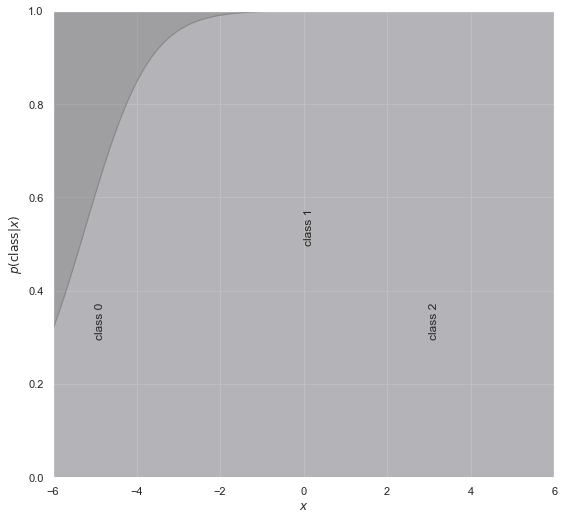

In [680]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot()

p = responsibilities
p = p[:, (1, 0, 2)]  # rearrange order so the plot looks better
p = p.cumsum(1).T

ax.fill_between(x, 0, p[0], color='gray', alpha=0.3)
ax.fill_between(x, p[0], p[1], color='gray', alpha=0.5)
ax.fill_between(x, p[1], 1, color='gray', alpha=0.7)
ax.set_xlim(-6, 6)
ax.set_ylim(0, 1)
ax.set_xlabel('$x$')
ax.set_ylabel(r'$p({\rm class}|x)$')

ax.text(-5, 0.3, 'class 0', rotation='vertical')
ax.text(0, 0.5, 'class 1', rotation='vertical')
ax.text(3, 0.3, 'class 2', rotation='vertical')

Log likelihood scores for dataset 1

In [460]:
score1=gmm1.score_samples(data1)
score1

array([-2.583862  , -2.73376154, -2.79712906, -3.31805409, -2.67694977,
       -2.73701077, -2.68002322, -3.25010971, -2.70165654, -5.70148327,
       -2.66255836, -2.82647701, -3.84692139, -2.64356742, -3.50926611,
       -2.64807292, -3.34583732, -2.80635418, -2.65910211, -2.84909245,
       -2.91678608, -3.87980199, -2.58406462, -3.18110118, -4.26131364,
       -3.03912527, -3.31713489, -5.19396918, -2.72353051, -2.97360097,
       -2.63648463, -2.83614883, -2.72671033, -3.72677112, -2.65181474,
       -2.67458163, -3.11245571, -4.33763004, -2.65595118, -3.28082802,
       -2.66999212, -2.83265915, -3.36411069, -3.46297429, -2.76396849,
       -2.74723073, -4.2658857 , -2.70428298, -2.57966211, -2.74121924,
       -3.65756976, -2.91220984, -4.37199972, -2.67250565, -2.67071072,
       -2.65479652, -2.59001735, -3.99947229, -3.19372518, -2.78253772])

Log likelihood scores for dataset 2

In [375]:
score2=gmm2.score_samples(data2)
score2

array([-3.55025875, -3.72622852, -3.49965575, -4.09317416, -3.58662884,
       -3.83397236, -3.50743529, -3.66501091, -3.66891265, -5.31036074,
       -3.64199737, -3.67482324, -3.66616353, -4.37861222, -3.49044896,
       -3.65191507, -4.13689482, -3.540244  , -3.66229965, -3.82170612,
       -3.65693426, -3.55538072, -3.66614601, -3.65340202, -4.48465834,
       -3.56720979, -5.98066837, -3.69021349, -5.06892567, -3.613705  ,
       -3.58085547, -4.62340377, -3.48394739, -3.54540682, -3.49344163,
       -3.54684813, -4.34120302, -3.8507934 , -3.50271738, -3.48833125,
       -3.52154606, -3.54881485, -3.68589507, -4.39449083, -3.65862802,
       -3.71109617, -3.89340247, -4.49115411, -3.82171682, -3.54391457,
       -3.65194455, -3.83729519, -3.54451465, -3.53625905, -3.5100474 ,
       -4.66208653, -3.51621855, -3.55047463, -5.01437139, -4.37639009])

Log likelihood scores for dataset 3

In [376]:
score3=gmm3.score_samples(data3)
score3

array([-3.44844771, -3.63793364, -3.50469381, -3.33204959, -3.64890575,
       -4.02935648, -4.93193255, -3.61821763, -5.54932405, -3.48605544,
       -3.72685926, -3.91238381, -3.95431735, -4.54056061, -3.49161391,
       -4.1046742 , -3.7169992 , -3.68093253, -3.66064515, -3.80223363,
       -4.57240019, -3.58707499, -3.28500078, -3.59505929, -3.45494314,
       -3.45122692, -3.35772631, -3.21043157, -4.32045616, -3.33296737,
       -3.72368585, -3.23454257, -3.25063719, -4.23773884, -3.50679585,
       -4.5963781 , -3.75201646, -3.46143756, -3.74708364, -3.39765322,
       -3.604853  , -3.43909853, -3.51471434, -3.56805436, -3.84808925,
       -3.84389116, -3.70802658, -3.45274472, -3.50190812, -4.39231749,
       -3.20574118, -3.52130051, -3.22396936, -4.20928855, -3.2757343 ,
       -3.22369857, -4.69951706, -4.54107993, -4.52654951, -3.86912778])

# Plot for all 3 datasets

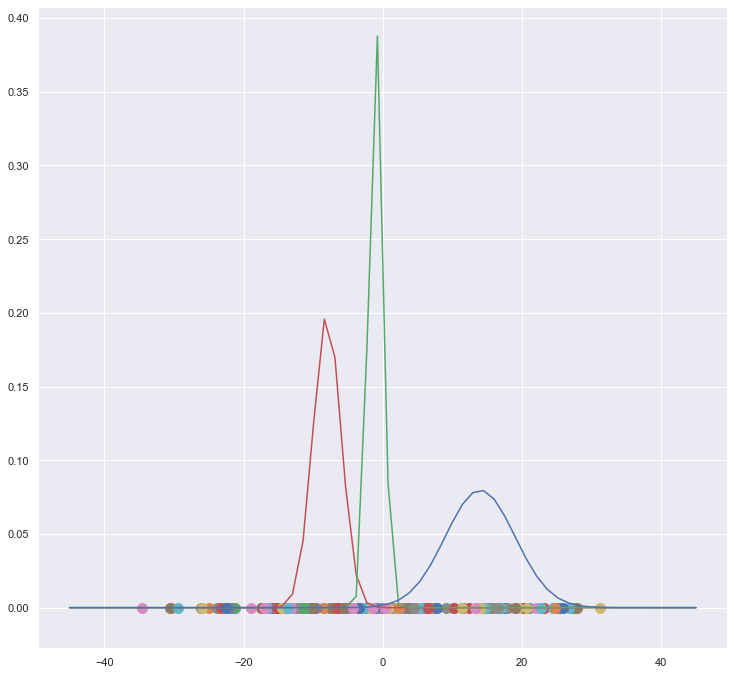

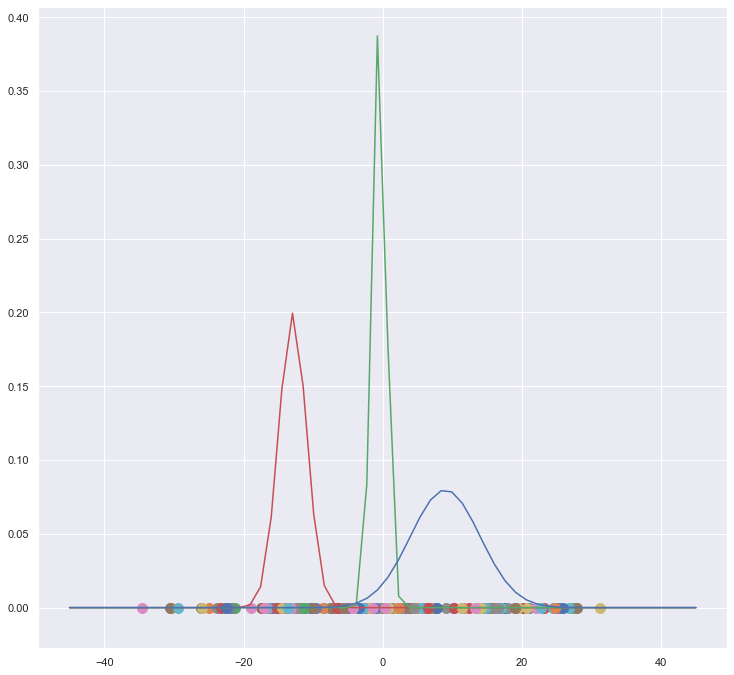

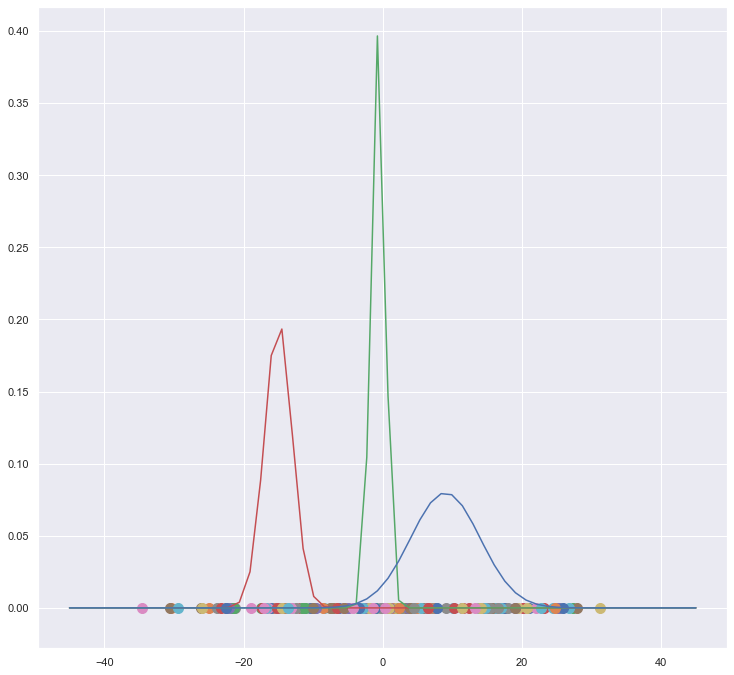

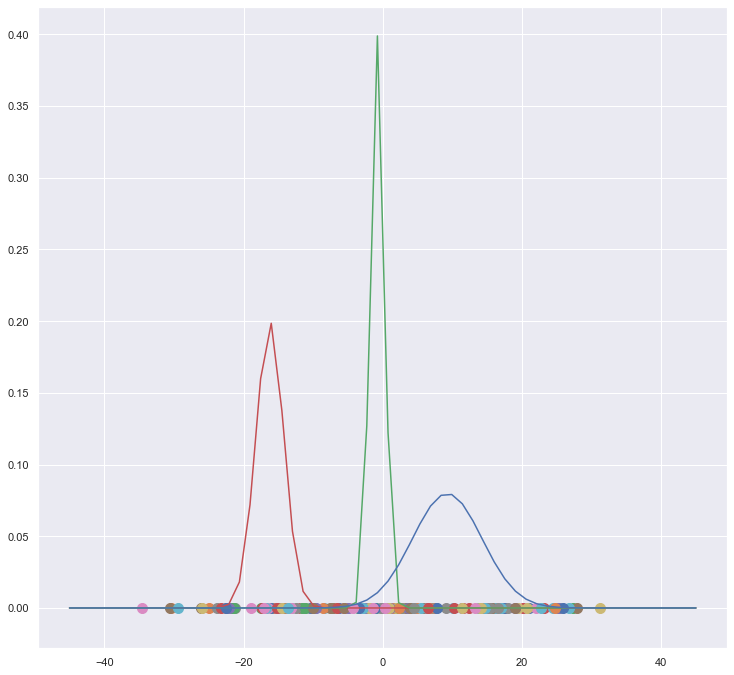

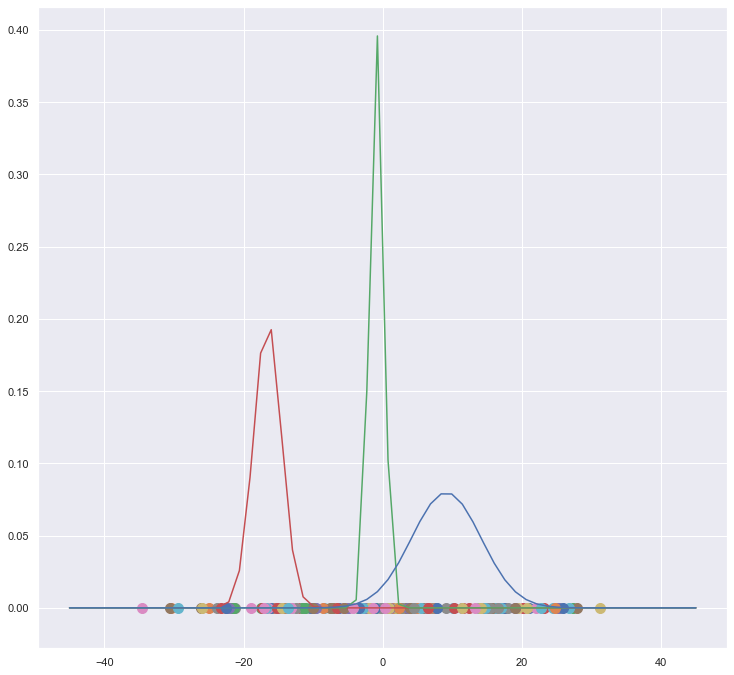

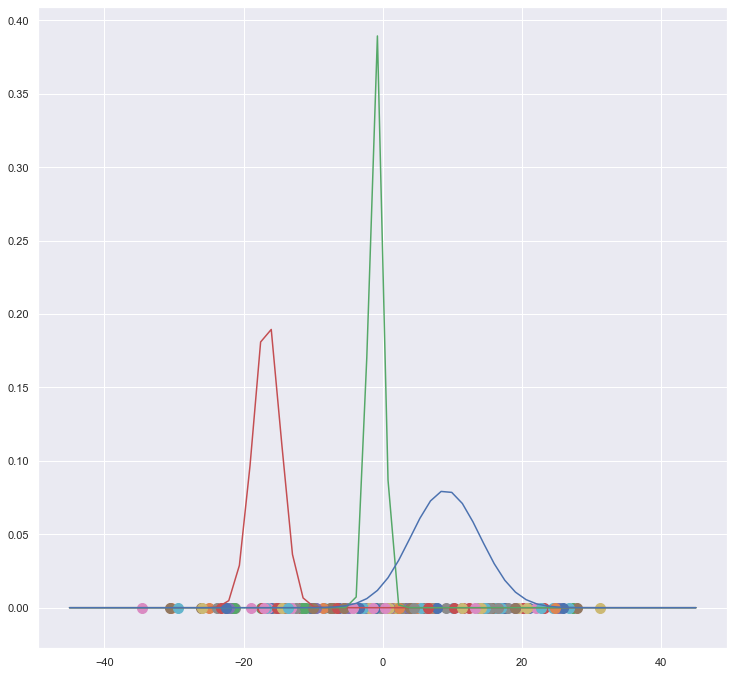

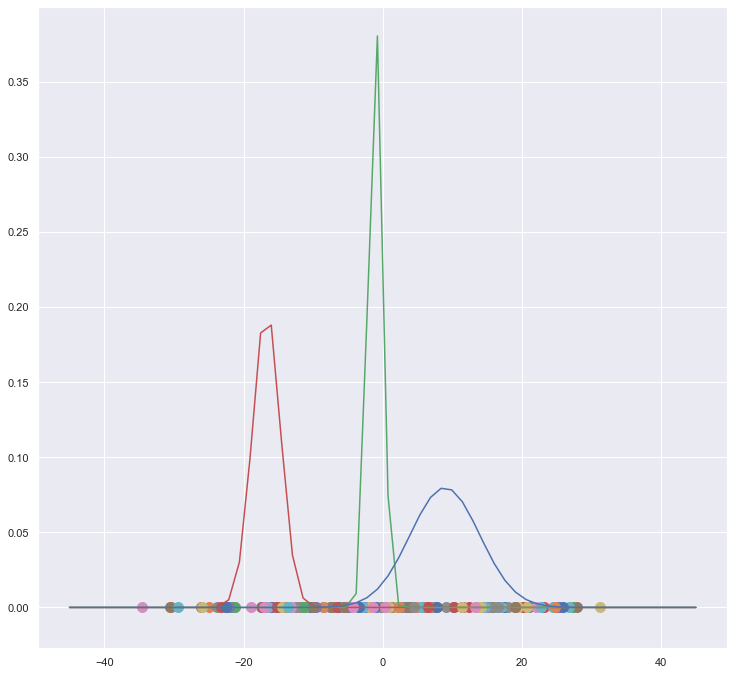

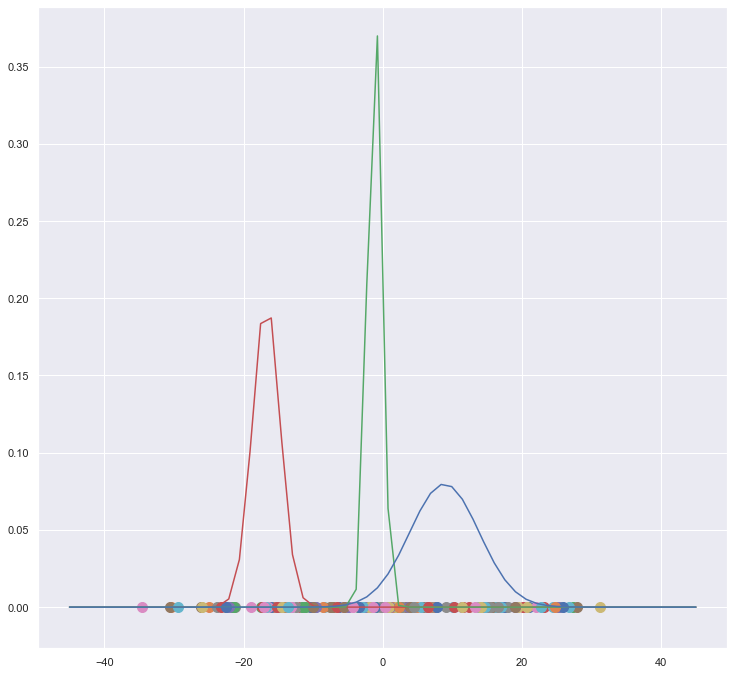

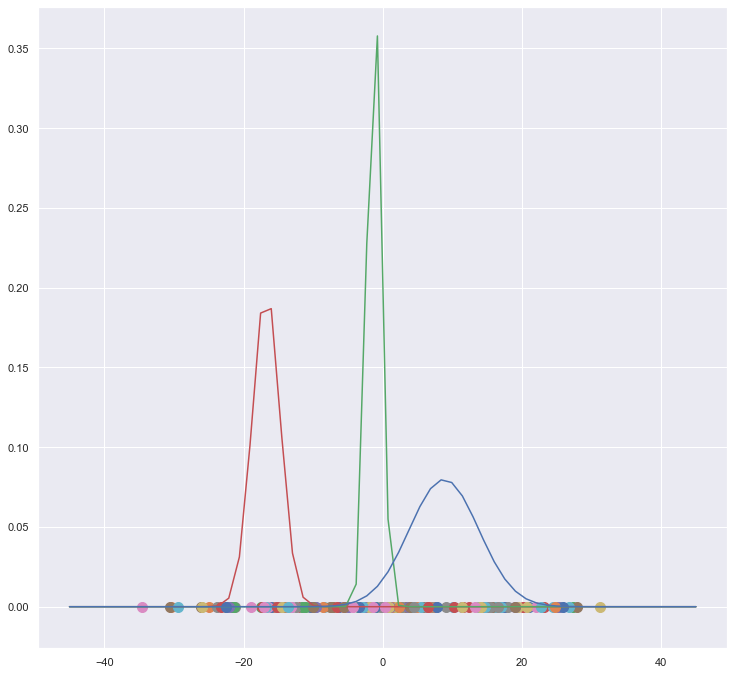

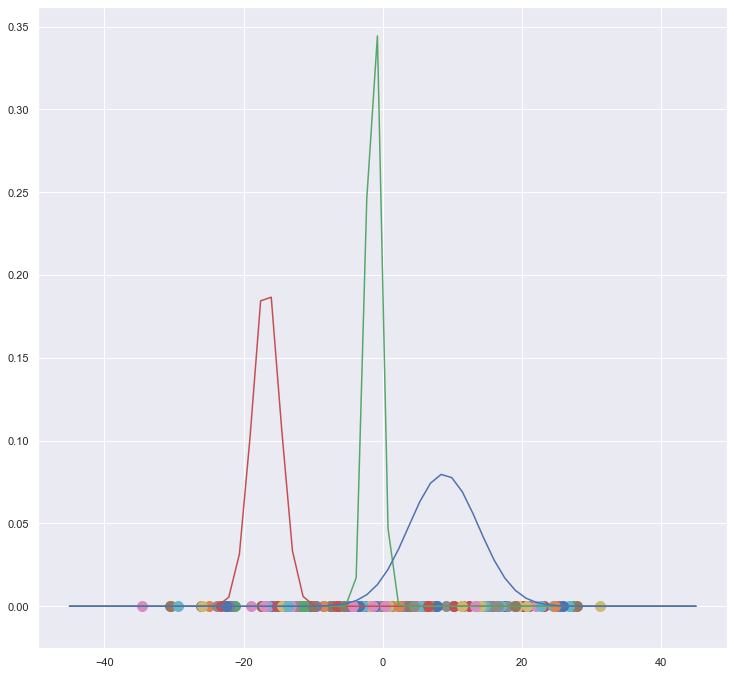

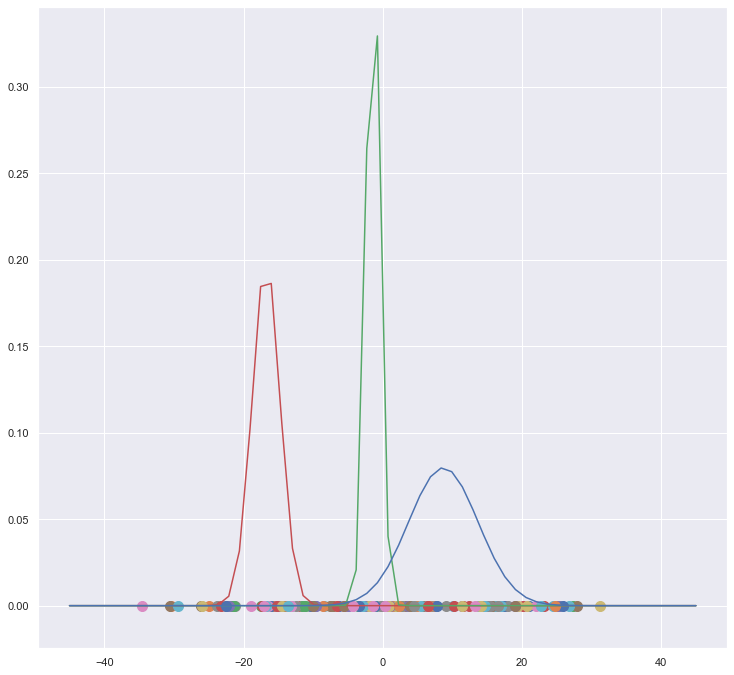

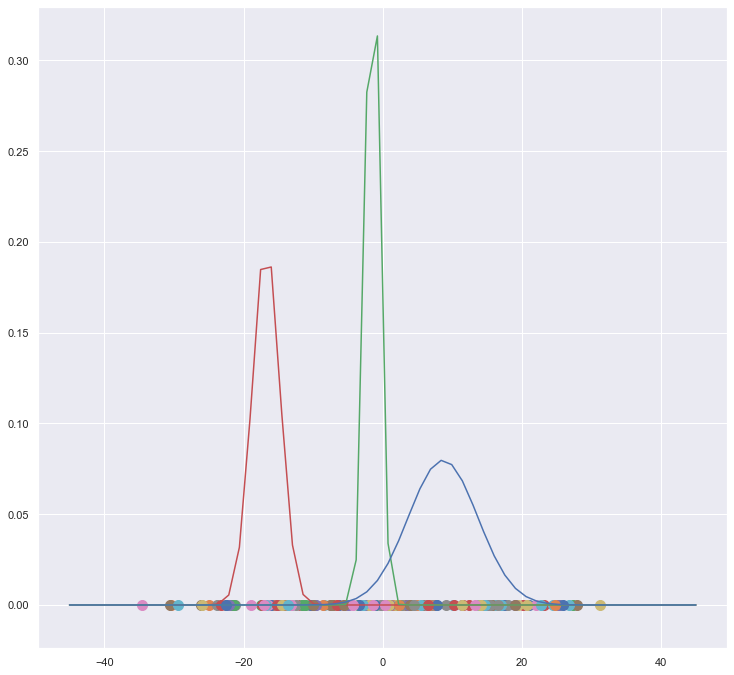

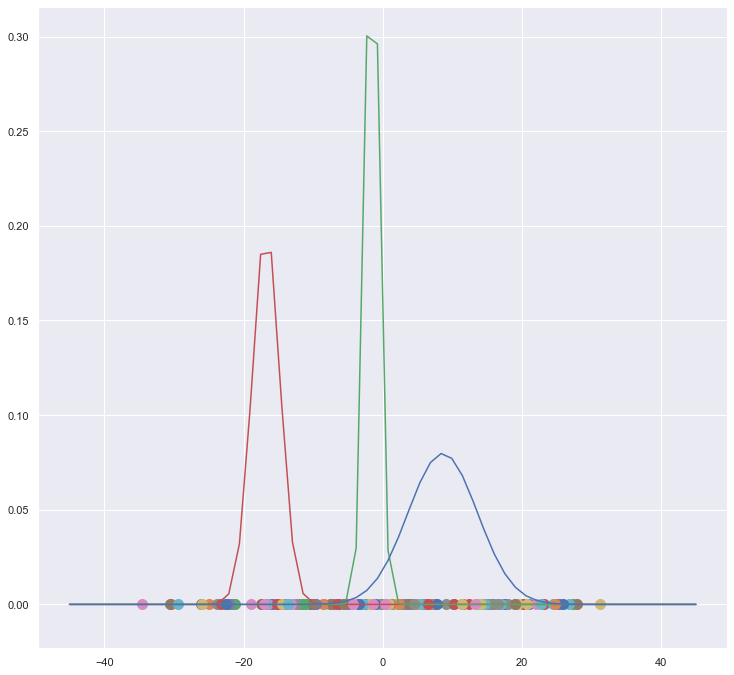

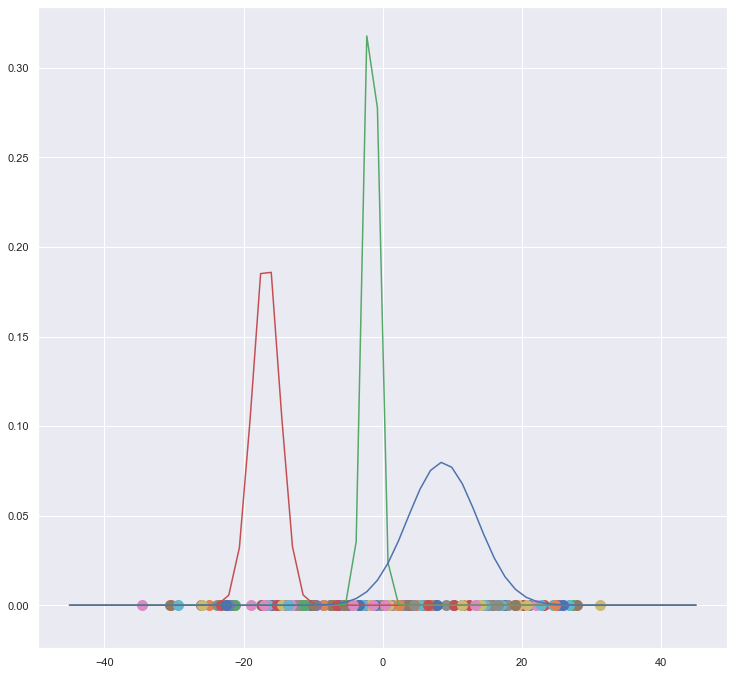

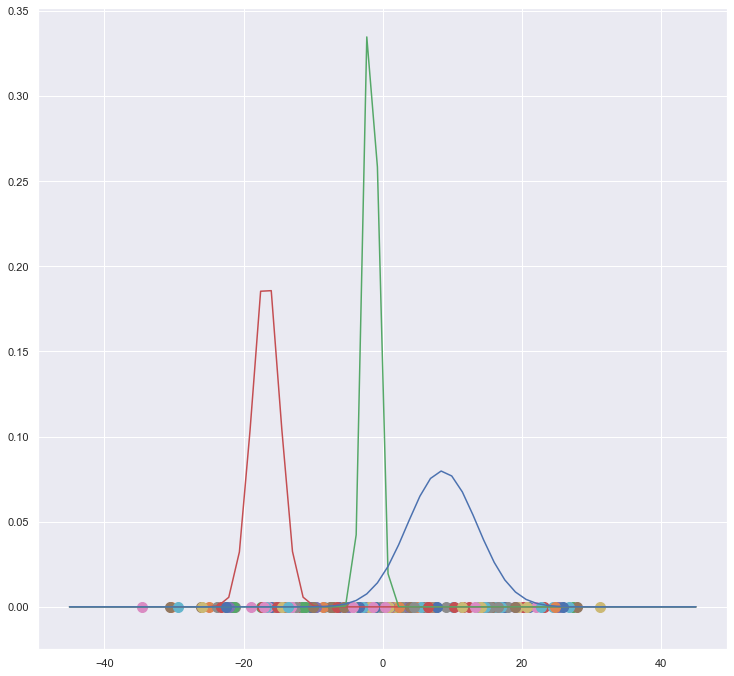

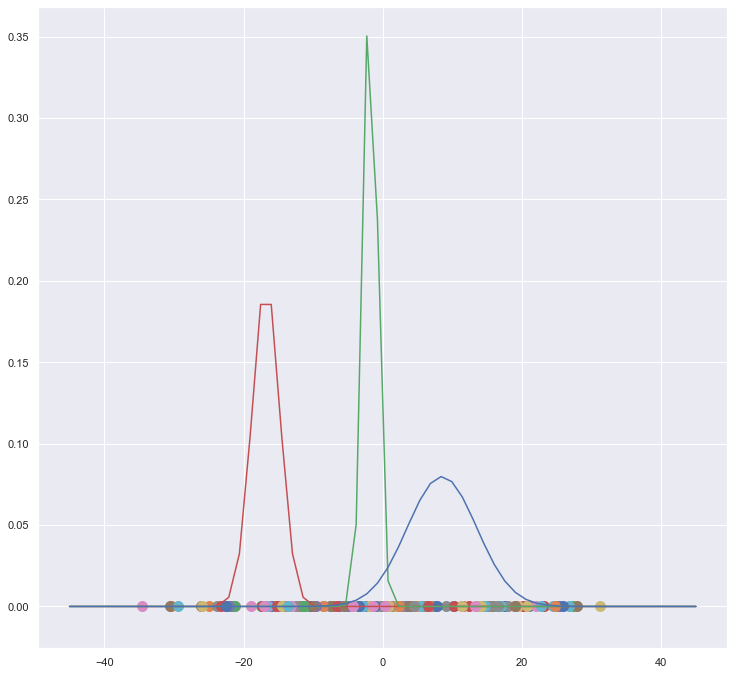

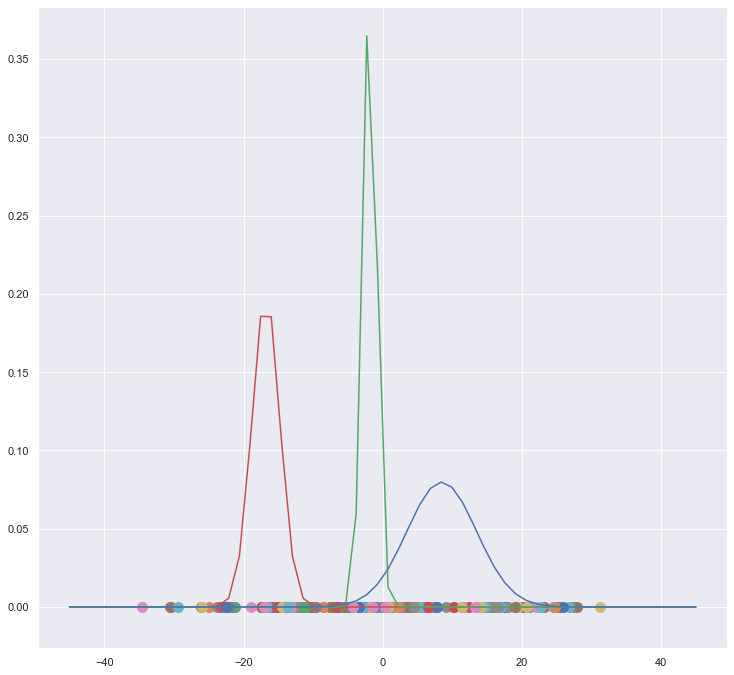

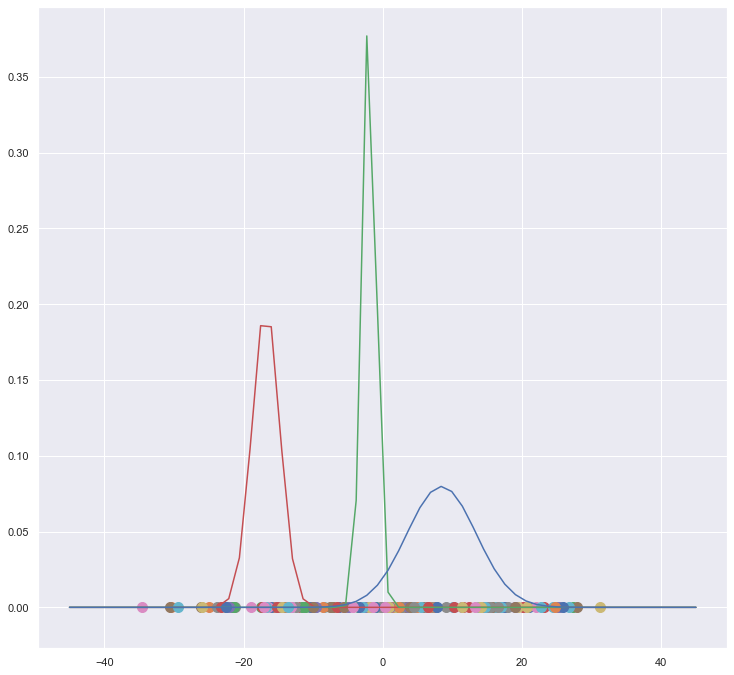

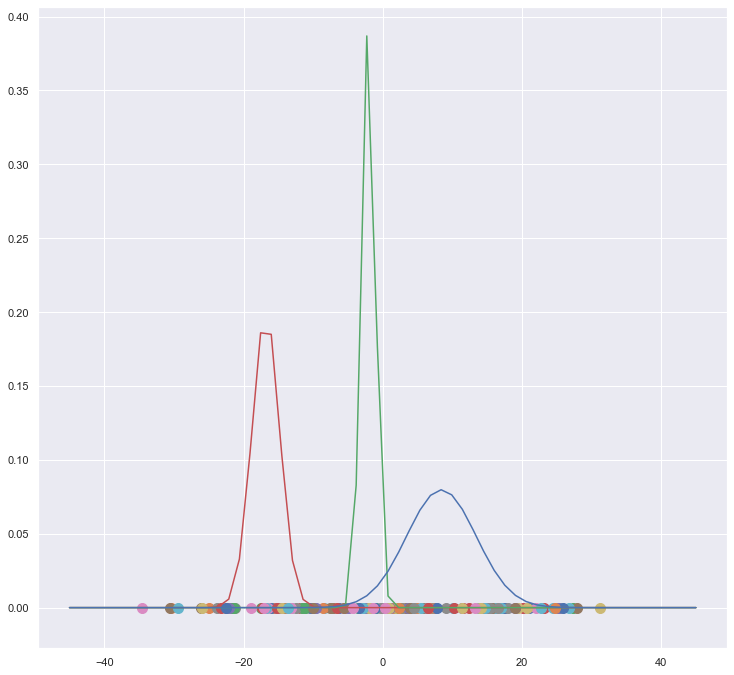

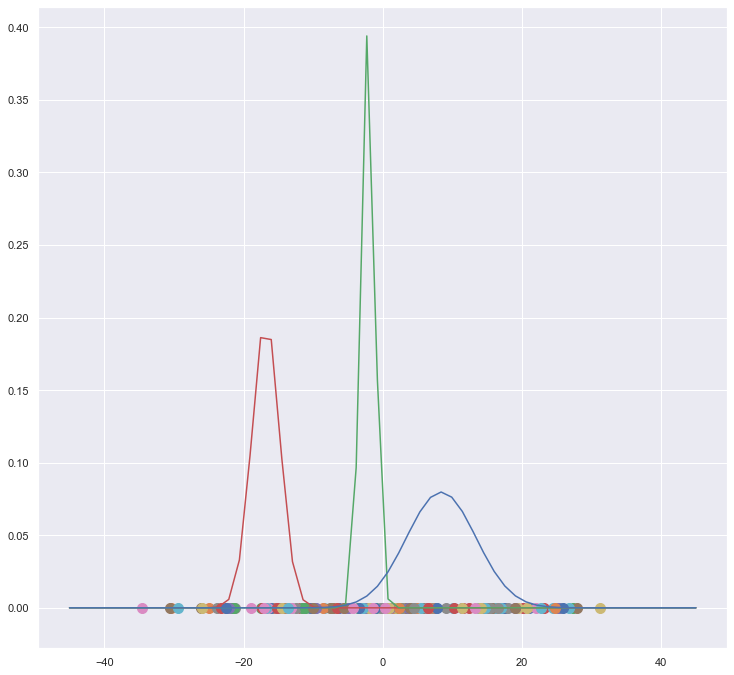

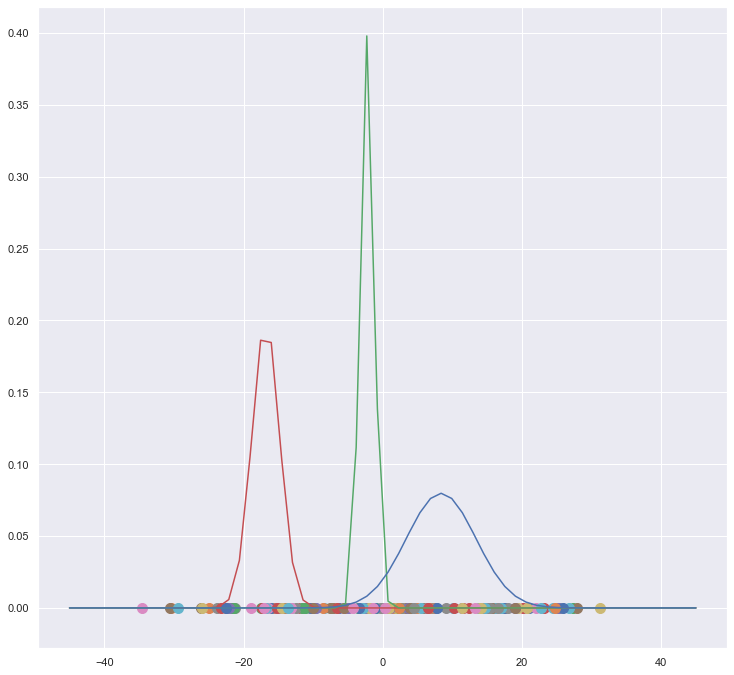

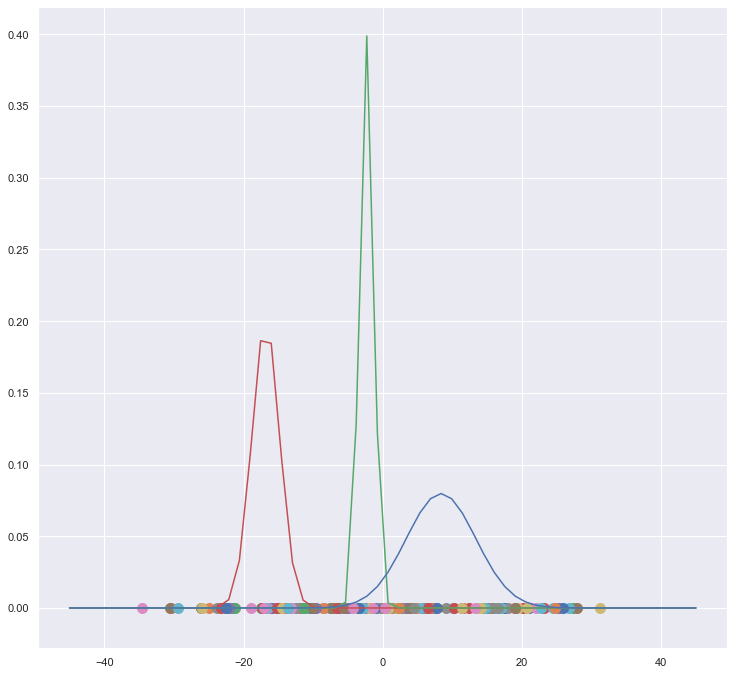

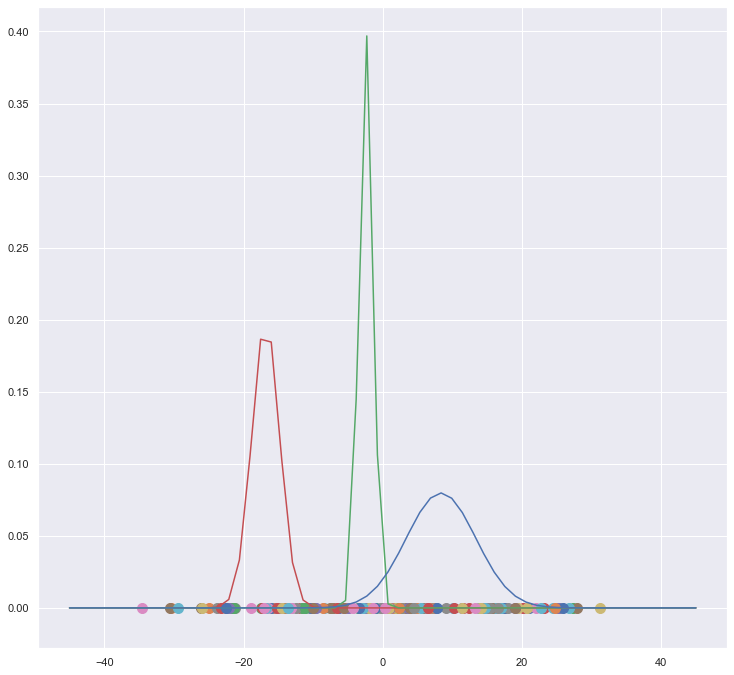

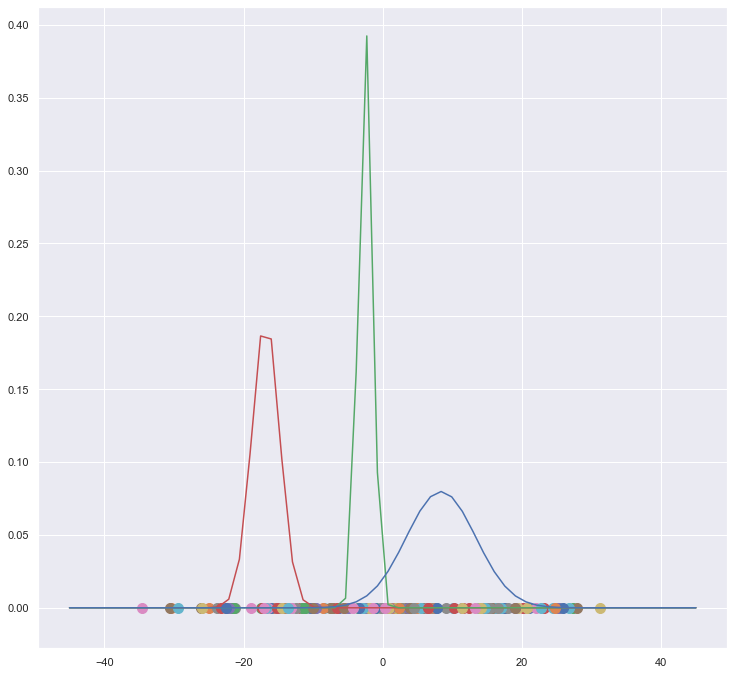

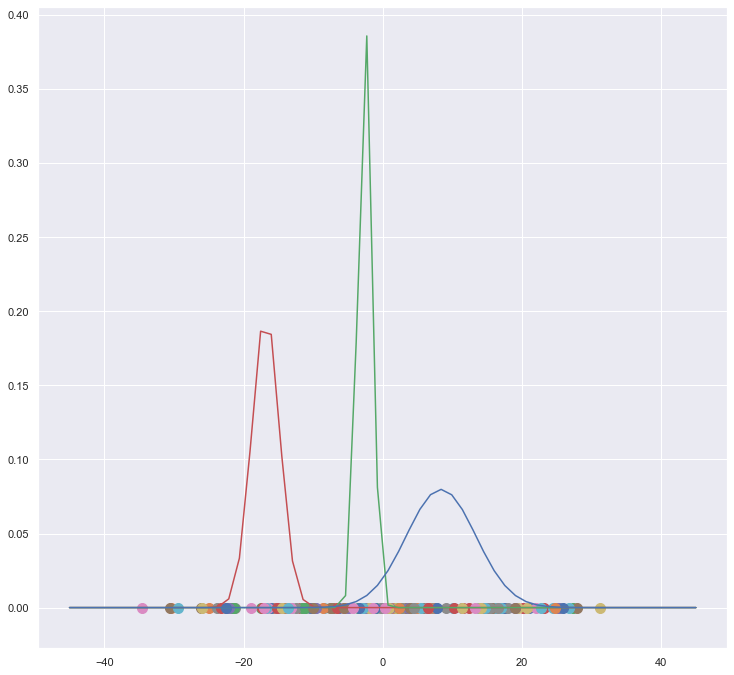

In [475]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import pandas as pd
import pickle
from scipy.stats import norm
from matplotlib.axes._axes import _log as matplotlib_axes_logger 
matplotlib_axes_logger.setLevel('ERROR')
np.random.seed(0)

def load(name):
    file = open(name,'rb')
    data = pickle.load(file)
    file.close()
    return data

def save(data,name):
    file = open(name, 'wb')
    pickle.dump(data,file)
    file.close()

class GMM1D:
    def __init__(self,X,iterations,initmean,initprob,initvariance):
    #"""initmean = [a,b,c] initprob=[1/3,1/3,1/3] initvariance=[d,e,f]"""    
        self.iterations = iterations
        self.X = X
        self.mu = initmean
        self.pi = initprob
        self.var = initvariance
        self.curr_log_likelihood=[]
    
    """E step"""

    def calculate_prob(self,r):
        for c,g,p in zip(range(3),[norm(loc=self.mu[0],scale=self.var[0]),
                                       norm(loc=self.mu[1],scale=self.var[1]),norm(loc=self.mu[2],scale=self.var[2])],self.pi):
            r[:,c] = p*g.pdf(self.X)
        """
        Normalize the probabilities such that each row of r sums to 1 and weight it by mu_c == the fraction of points belonging to 
        cluster c
        """
        for i in range(len(r)):
            mixture=(np.sum(self.pi)*np.sum(r,axis=1)[i])
            r[i]=r[i]/mixture
        return r
    #np.array([r[i][0],r[i][1],r[i][2]])
    def plot(self,r):
        fig = plt.figure(figsize=(11,11))
        ax0 = fig.add_subplot(111)
        for i in range(len(r)):
#             Color = np.array([r[i][0],r[i][1],r[i][2]])
#             rcnt = r.shape[0]
#             ColorsRepeated = np.repeat(np.atleast_2d(Color), rcnt, axis = 0)    
            ax0.scatter(self.X[i],0,s=100)
        """Plot the gaussians"""
        for g,c in zip([norm(loc=self.mu[0],scale=self.var[0]).pdf(np.linspace(-45,45,num=60)),
                        norm(loc=self.mu[1],scale=self.var[1]).pdf(np.linspace(-45,45,num=60)),
                        norm(loc=self.mu[2],scale=self.var[2]).pdf(np.linspace(-45,45,num=60))],['r','g','b']):
            ax0.plot(np.linspace(-45,45,num=60),g,c=c)
    
    def run(self):
        for iter in range(self.iterations):
            #print(self.mu,self.var,self.pi)
            """Create the array r with dimensionality nxK"""
            r = np.zeros((len(self.X),3))  

            """
            Probability for each datapoint x_i to belong to gaussian g 
            """
            r = self.calculate_prob(r)


            """Plot the data"""
            self.plot(r)
            
            """M-Step"""

            """calculate m_c"""
            m_c = []
            # write code here
            length=len(r[0])
            for i in  range(length):
                m_c.append(np.sum(r[:,i]))
            
            """calculate pi_c"""
            pi_c=[]
            # write code here
            for k in range(len(m_c)):
                fraction=m_c[k]
                total=np.sum(m_c)
                self.pi[k]=fraction/total
            
            """calculate mu_c"""
            # write code here
            xlen=len(self.X)
            self.mu = np.sum(self.X.reshape(xlen,1)*r,axis=0)
            self.mu=self.mu/m_c
            #print('mu :',self.mu)

            """calculate var_c"""
            var_c = []
#             for c in range(len(r[0])):
#                  var_c.append((1/m_c[c])*np.dot(((np.array(r[:,c]).reshape(180,1))*(self.X.reshape(len(self.X),1)-self.mu[c])).T,(self.X.reshape(len(self.X),1)-self.mu[c])))#write code here
            length_var=r.shape[1]
            for i in range(length_var):
                x=np.array(r[:,i]).reshape(180,1)
                variance=np.dot(((np.array(r[:,i]).reshape(180,1))*(self.X.reshape(len(self.X),1)-mu_c[i])).T,(self.X.reshape(len(self.X),1)-mu_c[i]))
                variance=variance/m_c[i]
                var_c.append(variance)
            plt.show()
    def plot_log():
         self.curr_log_likelihoods.append(np.log(np.sum([k*multivariate_normal(self.mu[i],self.cov[j]).pdf(X) for k,i,j in zip(self.pi,range(len(self.mu)),range(len(self.cov)))])))
        
        

data1=pd.read_pickle('dataset1.pkl')
data2=pd.read_pickle('dataset2.pkl')
data3=pd.read_pickle('dataset3.pkl')
data=np.concatenate((data1,data2,data3)).reshape(180)
mean1,mean2,mean3=-8,-1,14
var1,var2,var3=2,1,5
g = GMM1D(data,25,[mean1,mean2,mean3],[1/3,1/3,1/3],[var1,var2,var3])
g.run()
